# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></div><div class="lev1 toc-item"><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></div><div class="lev3 toc-item"><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-201"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autoimport my code</a></div><div class="lev3 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-202"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Plotting</a></div><div class="lev1 toc-item"><a href="#Logistic-Regression-with-Kmers" data-toc-modified-id="Logistic-Regression-with-Kmers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic Regression with Kmers</a></div><div class="lev1 toc-item"><a href="#Kmer-subsetting" data-toc-modified-id="Kmer-subsetting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Kmer subsetting</a></div><div class="lev2 toc-item"><a href="#Significance" data-toc-modified-id="Significance-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Significance</a></div><div class="lev2 toc-item"><a href="#Plotting" data-toc-modified-id="Plotting-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Plotting</a></div><div class="lev3 toc-item"><a href="#Odds-and-Ends" data-toc-modified-id="Odds-and-Ends-421"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Odds and Ends</a></div><div class="lev3 toc-item"><a href="#Inverse-kmers" data-toc-modified-id="Inverse-kmers-422"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Inverse kmers</a></div><div class="lev1 toc-item"><a href="#Community-Kmer-stats" data-toc-modified-id="Community-Kmer-stats-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Community Kmer stats</a></div><div class="lev1 toc-item"><a href="#Clusters" data-toc-modified-id="Clusters-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Clusters</a></div><div class="lev2 toc-item"><a href="#Repressive-similarity" data-toc-modified-id="Repressive-similarity-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Repressive similarity</a></div><div class="lev2 toc-item"><a href="#Mouse-repeat" data-toc-modified-id="Mouse-repeat-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Mouse repeat</a></div><div class="lev1 toc-item"><a href="#RNA-IP" data-toc-modified-id="RNA-IP-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>RNA IP</a></div><div class="lev1 toc-item"><a href="#R-distributions" data-toc-modified-id="R-distributions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>R distributions</a></div><div class="lev1 toc-item"><a href="#Sub-communities" data-toc-modified-id="Sub-communities-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Sub communities</a></div><div class="lev2 toc-item"><a href="#Comm-1" data-toc-modified-id="Comm-1-91"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Comm 1</a></div><div class="lev1 toc-item"><a href="#7mers" data-toc-modified-id="7mers-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>7mers</a></div><div class="lev2 toc-item"><a href="#And-5mers" data-toc-modified-id="And-5mers-101"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>And 5mers</a></div><div class="lev1 toc-item"><a href="#Clean-up" data-toc-modified-id="Clean-up-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Clean up</a></div><div class="lev1 toc-item"><a href="#MEME" data-toc-modified-id="MEME-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>MEME</a></div>

# Watermark

In [1]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,sklearn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

Jessime Kirk Wed Nov 01 2017 

CPython 3.6.3
IPython 6.1.0

numpy 1.13.3
scipy 0.19.1
pandas 0.20.3
sklearn 0.19.1
matplotlib 2.1.0
seaborn 0.8.0
networkx 2.0
notebook 5.0.0
jupyter_contrib_nbextensions 0.2.8

compiler   : GCC 7.2.0
system     : Linux
release    : 4.10.0-35-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [45]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import random

from tqdm import tqdm, trange, tqdm_notebook, tnrange

from sklearn.metrics import precision_recall_fscore_support

from scipy.stats import pearsonr
from scipy.stats import chisquare
from scipy.stats import describe
from scipy.stats import chi2_contingency

from itertools import product

from collections import defaultdict

from Bio.Seq import Seq

import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display

from collections import Counter

### Autoimport my code

In [5]:
pwd

'/home/jessime/Code/kmers3/Notebooks'

In [6]:
cd ..

/home/jessime/Code/kmers3


In [7]:
%load_ext autoreload

In [8]:
%autoreload 2

### Plotting

In [9]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [9.0, 6.0]
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['legend.fontsize'] = 22
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Logistic Regression with Kmers

I finally got HepG2 predictions. At this point, it doesn't matter how well they do (within reason), they're just too slow. But let's see what happens.

In [8]:
predictions = '/home/jessime/Research/proteins/predictions_kmers.csv'
predictions = pd.read_csv(predictions, index_col=0)
print(predictions.shape)
predictions.head()

(3746, 70)


AGGF1  AUH  BCCIP  BUD13  CDC40  CSTF2  CSTF2T  DDX3X  DDX55  DDX59  ...   \
0                                                                       ...    
0    0.0  0.0    0.0    0.0    0.0    0.0     0.0    0.0    0.0    0.0  ...    
1    0.0  0.0    1.0    1.0    1.0    0.0     0.0    1.0    1.0    0.0  ...    
2    0.0  0.0    0.0    0.0    0.0    1.0     1.0    0.0    1.0    0.0  ...    
3    1.0  1.0    1.0    1.0    1.0    1.0     1.0    0.0    1.0    0.0  ...    
4    1.0  1.0    0.0    0.0    1.0    0.0     0.0    0.0    1.0    0.0  ...    

   TBRG4  TIA1  TRA2A  TROVE2  U2AF1  U2AF2  UCHL5  XPO5  XRCC6  XRN2  
0                                                                      
0    0.0   0.0    0.0     0.0    0.0    0.0    0.0   0.0    0.0   0.0  
1    0.0   0.0    0.0     0.0    1.0    0.0    1.0   0.0    0.0   1.0  
2    0.0   1.0    1.0     0.0    1.0    0.0    0.0   0.0    0.0   0.0  
3    0.0   1.0    0.0     1.0    1.0    1.0    1.0   1.0    0.0   1.0  
4    0.0   0.0    0.0     0.0    0.0    0.0    0.0   0.0    0.0   0.0  

[5 rows x 70 columns]

And get the originals for comparision.

In [10]:
HepG2_X_y_df = '/home/jessime/Research/proteins/HepG2_p0.13_X_y_df.csv'
HepG2_X_y_df = pd.read_csv(HepG2_X_y_df, index_col=0)
y_df = HepG2_X_y_df.iloc[:, 9:]

In [13]:
kmers_precision = []
kmers_recall = []
for protein in y_df:
    prf = precision_recall_fscore_support(y_df[protein], predictions[protein])
    kmers_precision.append(prf[0][1])
    kmers_recall.append(prf[1][1])

Lets add these to the old precision/recall data and see how they compare.

In [33]:
precision_recall_df = '/home/jessime/Research/proteins/full_precision_recall_df.csv'
precision_recall_df = pd.read_csv(precision_recall_df, index_col=0)
print(precision_recall_df.shape)
precision_recall_df.head()

(312, 4)


Precision    Recall Cell Type Model
AGGF1   0.336512  0.671196     HepG2  Null
AUH     0.222042  0.711688     HepG2  Null
BCCIP   0.253100  0.676413     HepG2  Null
BUD13   0.324648  0.700608     HepG2  Null
CDC40   0.333104  0.649264     HepG2  Null

In [34]:
for protein, p, r in zip(y_df, kmers_precision, kmers_recall):
    row = pd.Series(data=[p, r, 'HepG2', 'Kmer'],
                    index=['Precision', 'Recall', 'Cell Type', 'Model'],
                    name=protein)
    precision_recall_df = precision_recall_df.append(row)

print(precision_recall_df.shape)
precision_recall_df.tail()

(382, 4)


Precision    Recall Cell Type Model
U2AF2   0.295302  0.481400     HepG2  Kmer
UCHL5   0.342978  0.508036     HepG2  Kmer
XPO5    0.180772  0.402930     HepG2  Kmer
XRCC6   0.149489  0.398515     HepG2  Kmer
XRN2    0.288099  0.508323     HepG2  Kmer

In [41]:
pr_hepG2 = precision_recall_df[precision_recall_df['Cell Type'] == 'HepG2']
precision_hepG2_kmer = (pr_hepG2[pr_hepG2['Model'] == 'Kmer']['Precision'] - 
                        pr_hepG2[pr_hepG2['Model'] == 'Null']['Precision']) * 100
precision_hepG2_comm = (pr_hepG2[pr_hepG2['Model'] == 'Comm']['Precision'] - 
                        pr_hepG2[pr_hepG2['Model'] == 'Null']['Precision']) * 100

recall_hepG2_kmer = (pr_hepG2[pr_hepG2['Model'] == 'Kmer']['Recall'] - 
                     pr_hepG2[pr_hepG2['Model'] == 'Null']['Recall']) * 100
recall_hepG2_comm = (pr_hepG2[pr_hepG2['Model'] == 'Comm']['Recall'] - 
                     pr_hepG2[pr_hepG2['Model'] == 'Null']['Recall']) * 100

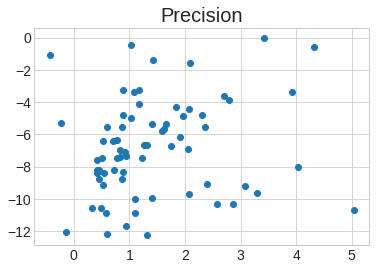

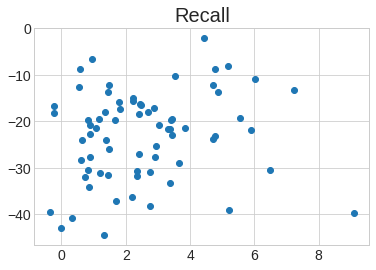

In [42]:
plt.scatter(precision_hepG2_comm, precision_hepG2_kmer)
plt.title('Precision')
plt.show()
plt.scatter(recall_hepG2_comm, recall_hepG2_kmer)
plt.title('Recall')
plt.show()

In [47]:
null_df = '/home/jessime/Research/proteins/predictions_null_balanced.csv'
null_df = pd.read_csv(null_df, index_col=0)
comm_df = '/home/jessime/Research/proteins/predictions_comm_balanced.csv'
comm_df = pd.read_csv(comm_df, index_col=0)

pd.DataFrame(data=[y_df.sum(), null_df.sum(), comm_df.sum(), predictions.sum()], 
             index=['Real', 'Null', 'Comm', 'Kmer'])

AGGF1     AUH   BCCIP   BUD13   CDC40   CSTF2  CSTF2T   DDX3X   DDX55  \
Real   736.0   385.0   513.0   658.0   747.0  1263.0  1025.0   482.0   503.0   
Null  1468.0  1234.0  1371.0  1420.0  1456.0  1644.0  1598.0  1314.0  1336.0   
Comm  1472.0  1225.0  1329.0  1392.0  1478.0  1624.0  1609.0  1184.0  1305.0   
Kmer  1349.0   989.0  1131.0  1319.0  1381.0  1704.0  1512.0  1155.0  1199.0   

       DDX59   ...     TBRG4    TIA1   TRA2A  TROVE2   U2AF1   U2AF2   UCHL5  \
Real   558.0   ...     473.0   675.0   242.0   580.0   984.0   914.0  1120.0   
Null  1419.0   ...    1380.0  1433.0  1060.0  1372.0  1547.0  1566.0  1581.0   
Comm  1393.0   ...    1409.0  1433.0  1036.0  1375.0  1571.0  1540.0  1590.0   
Kmer  1185.0   ...    1132.0  1303.0   882.0  1143.0  1519.0  1490.0  1659.0   

        XPO5   XRCC6    XRN2  
Real   546.0   404.0   781.0  
Null  1384.0  1251.0  1475.0  
Comm  1375.0  1240.0  1513.0  
Kmer  1217.0  1077.0  1378.0  

[4 rows x 70 columns]

# Kmer subsetting

Our conversation with Peter gave us another method to use for kmer subsetting with the tetris assay:

* Using kmers that are variable between communities might work as a sub-setting method:
  * Calculate the mean kmer count for each kmer for each community
  * Rank order the kmers by their variance across the communities
  * Add one of them at a time and plot the subset size vs the R value score of [similarity with Xist vs. repressive activity].
  
The first part of this is to get our ordered list of kmers.

In [48]:
counts = '/home/jessime/Research/6mers01_M5_norm.csv'
counts = pd.read_csv(counts, index_col=0)
counts.shape

(8245, 4096)

In [49]:
groups = '/home/jessime/Research/groups_M5.csv'
groups = pd.read_csv(groups, index_col=0)
groups.shape

(8245, 1)

In [53]:
group_counts = counts.join(groups)
group_counts.shape

(8245, 4097)

In [54]:
group_counts = group_counts.groupby('Group').mean()
print(group_counts.shape)
group_counts.head()

(6, 4096)


AAAAAA    AAAAAG    AAAAAT    AAAAAC    AAAAGA    AAAAGG    AAAAGT  \
Group                                                                         
0      0.246712  0.198355  0.525262  0.246297  0.154514  0.056861  0.266251   
1     -0.163179 -0.263691 -0.333799 -0.188736 -0.272851 -0.071618 -0.230618   
2      0.148345  0.211403 -0.056434  0.180667  0.117589 -0.033878  0.066712   
3     -0.036328  0.386210 -0.094413 -0.494077  0.425221 -0.106387  0.339830   
4     -0.181186  0.145812 -0.098625 -0.051552 -0.006013  0.397212 -0.184841   

         AAAAGC    AAAATA    AAAATG    ...       CCCCGT    CCCCGC    CCCCTA  \
Group                                  ...                                    
0      0.067841  0.511910  0.327983    ...    -0.145262 -0.224547 -0.031257   
1     -0.118868 -0.372161 -0.261471    ...     0.300066  0.804156  0.157389   
2     -0.063354 -0.115080 -0.107622    ...    -0.070156 -0.118350 -0.076070   
3     -0.537362  0.814218 -0.584796    ...    -0.230365 -0.275234 -0.343276   
4      0.191507 -0.019897 -0.271070    ...     0.611321 -0.156719 -0.010863   

         CCCCTG    CCCCTT    CCCCTC    CCCCCA    CCCCCG    CCCCCT    CCCCCC  
Group                                                                        
0     -0.189297 -0.053277 -0.198200 -0.177422 -0.191365 -0.135050 -0.054516  
1      0.303511  0.214199  0.454855  0.381007  0.605069  0.356202  0.154683  
2     -0.074729  0.050937 -0.008524 -0.097598 -0.128627  0.063251 -0.034311  
3     -0.475986 -0.444128 -0.462746 -0.415736 -0.255853 -0.405063 -0.216361  
4      0.349456 -0.184574 -0.217356  0.374985 -0.196547  0.012188 -0.011210  

[5 rows x 4096 columns]

In [60]:
group_std = pd.DataFrame(group_counts.std(axis=0), columns=['std'])
group_std = group_std.sort_values('std', ascending=False)
group_std.head()

std
GATTGT  1.541726
AGACAT  1.374002
ATTGTT  1.308769
AATACT  1.307970
AGGTTT  1.215753

Now I have the ordering I'd like to pull from. At this point, I have the rest of the code from April, and just need to copy it over and do slight modifications.

In [32]:
%aimport tetris

In [33]:
infasta = '/home/jessime/Research/tetris/frags_xist18.fa'
outdir = '/home/jessime/Desktop/tetris_kmer_subs/'
mean = '/home/jessime/Code/old_kmers/data/M5_transcripts01_mean6.npy'
std = '/home/jessime/Code/old_kmers/data/M5_transcripts01_std6.npy'

name_map_file = '/home/jessime/Research/tetris/name_map.txt'
name_map = pickle.load(open(name_map_file, 'rb'))

to_drop = ['409/7(1.8-5.5k)',
'409/7(1.8-5.5k)',
'433/434 (repeat A delete)',
'435/436 (repeat A only)',
'Xist5.5',
'EGFP',
'Renilla',
'Empty',
'Xist1.8']

luc_all_metrics = pd.read_csv('/home/jessime/Research/tetris/luc_all_metrics2.csv', index_col=0)
luc_all_metrics.drop(to_drop, inplace=True)

def std_subset(n):
    kmer_subset = set(group_std.head(n).index)
    tet_mini = tetris.Tetris(infasta, 
                             mean, 
                             std, 
                             outdir, 
                             outfile=None,
                             frag_seq=False, 
                             nhmmer=False,
                             stretcher=False,
                             k=6, 
                             kmer_subset=kmer_subset,
                             silent=True)
    tet_mini.run()

    df = tet_mini.align_df
    df = df.rename(columns={'R_whole':'Rand_sub'}, index=name_map)
    luc_temp = luc_all_metrics.join(df['Rand_sub'])
    corr = pearsonr(luc_temp['Luciferase'], luc_temp['Rand_sub'])[0]
    return corr

In [76]:
corr_ls = [std_subset(i) for i in range(1, 4097)]

/home/jessime/Code/kmers3/pearson.py:21: RuntimeWarning: invalid value encountered in true_divide
  counts1 = (counts1.T / np.std(counts1, axis=1)).T
/home/jessime/Code/kmers3/pearson.py:23: RuntimeWarning: invalid value encountered in true_divide
  counts2 = (counts2.T / np.std(counts2, axis=1)).T


In [78]:
corr_ls[-5:]

[-0.51710879024246659,
 -0.5173498747530878,
 -0.51746779118546549,
 -0.5174953430574436,
 -0.51754057340988613]

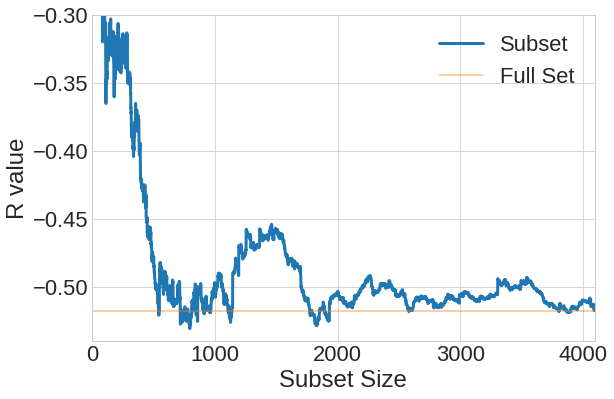

In [96]:
plt.plot(range(1, 4097), corr_ls, linewidth=3, label='Subset')
plt.plot((1, 4096), (corr_ls[-1], corr_ls[-1]), alpha=.5, label='Full Set')
plt.xlabel('Subset Size')
plt.ylabel('R value')
plt.ylim((-.54, -.3))
plt.xlim((0, 4096))
plt.legend()
outfile = '/home/jessime/Research/pics/teris_kmer_subs_M5_std.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [86]:
sorted(zip(range(1, 4097), corr_ls), key=lambda x: x[1])[:15]

[(1, nan),
 (795, -0.53072303852738723),
 (1829, -0.52857057083486314),
 (1830, -0.52847888293717415),
 (1831, -0.52831175923714668),
 (1828, -0.52808526823445479),
 (799, -0.52802876979824587),
 (1832, -0.52783683946579674),
 (798, -0.52752491452521222),
 (1835, -0.52752161469265901),
 (718, -0.52735471062901906),
 (800, -0.52730932272770659),
 (1826, -0.52727018642988022),
 (1825, -0.52725791804031696),
 (1822, -0.5272503188021721)]

## Significance

Okay, so I don't think this is significant, but a good way to test it is with a good old permutation test. I can round to a subset size of 800 and test what portion of random subsets are lower than -0.53. I'll have to think about how to set a p-value significance, because of multiple testing; but I'm hoping not to have to deal with that. 

In [66]:
kmers = np.array([''.join(i) for i in product('AGTC', repeat=6)])

def random_subset(n):
    kmer_subset = set(np.random.choice(kmers, size=n, replace=False))
    tet_mini = tetris.Tetris(infasta, 
                             mean, 
                             std, 
                             outdir, 
                             outfile=None,
                             frag_seq=False, 
                             nhmmer=False,
                             stretcher=False,
                             k=6, 
                             kmer_subset=kmer_subset,
                             silent=True)
    tet_mini.run()

    df = tet_mini.align_df
    df = df.rename(columns={'R_whole':'Rand_sub'}, index=name_map)
    luc_temp = luc_all_metrics.join(df['Rand_sub'])
    corr = pearsonr(luc_temp['Luciferase'], luc_temp['Rand_sub'])[0]
    return corr

def calc_p_val(n, obs):
    return sum(1 for i in range(1000) if random_subset(n) <= obs)/1000

In [102]:
calc_p_val(800, -.53)

0.142

Well that was easy

## Plotting

 > Yes I agree with you – will be useful to see the most variable kmer subsets plotted against your graph of randoms. Make a plot as if this will be a supplemental figure and list the filename in our response to reviews.
 
 To do this, I'm going to have to regenerate the random graph, since I don't still have the data.

In [31]:
def random_subset_old(n):
    k_list = []
    R_list = []
    min_r = 1.1
    min_df = None
    best_kmers = None
    
    for i in tnrange(n):
        #Pick random subset
        k = random.randint(2, 4095)
        k_list.append(k)
        kmer_subset = np.random.choice(kmers, size=k, replace=False)

        #Run similarities
        tet_mini = tetris.Tetris(infasta, 
                                 mean, 
                                 std, 
                                 outdir, 
                                 outfile=None,
                                 frag_seq=False, 
                                 nhmmer=False,
                                 stretcher=False,
                                 k=6, 
                                 kmer_subset=set(kmer_subset),
                                 silent=True)
        tet_mini.run()

        #Setup output of tetris to join with luciferase data
        df = tet_mini.align_df
        df = df.rename(columns={'R_whole':'Rand_sub'}, index=name_map)
#         df = df.replace(to_replace={'Sample':name_map})
#         df = df.set_index('Sample')
        luc_temp = luc_all_metrics.join(df['Rand_sub'])

        #Find correlation and save
        corr = pearsonr(luc_temp['Luciferase'], luc_temp['Rand_sub'])[0]
        R_list.append(corr)
        
        if corr < min_r:
            min_r = corr
            min_df = df
            best_kmers = kmer_subset
            
    return k_list, R_list, min_r, min_df, best_kmers

In [116]:
k_list, R_list, min_r, min_df, best_kmers = random_subset_old(100000)

A Jupyter Widget

In [120]:
rand_df = pd.DataFrame()
rand_df['set_size'] = k_list
rand_df['R_value'] = R_list
rand_df_sorted = rand_df.sort_values('set_size')
smooth_temp = rand_df_sorted.R_value.rolling(100).mean()
rand_df_sorted['Smooth'] = smooth_temp[::-1].rolling(100).mean()

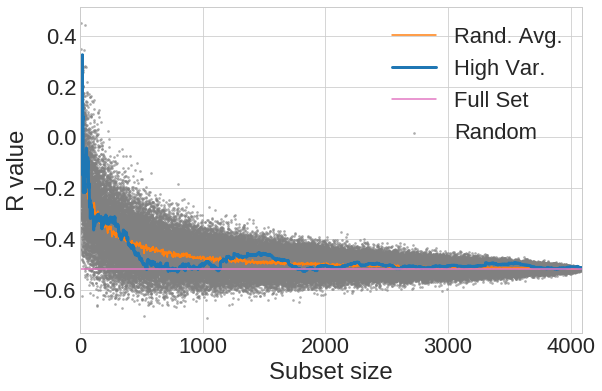

In [130]:
plt.scatter(k_list, R_list, color='gray', alpha=.5, s=3, label='Random')
plt.plot(rand_df_sorted['set_size'], rand_df_sorted['Smooth'], color=colors[1], label='Rand. Avg.')
plt.plot(range(1, 4097), corr_ls, linewidth=3, label='High Var.')
plt.plot((1, 4096), (corr_ls[-1], corr_ls[-1]), color=colors[6], label='Full Set')

plt.xlim((0, 4096))
plt.xlabel('Subset size')
plt.ylabel('R value')
plt.legend()
outfile = '/home/jessime/Research/pics/tetris_rand_kmer_subsets3.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
outfile = '/home/jessime/Research/pics/tetris_rand_kmer_subsets3.png'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

I didn't save the values of different subset trials in April, but I didn't output the entire dataframe in the notebook, thankfully. This is from output [99].

In [27]:
tetris_corr = """R_sub_3i, -0.561377
R_sub_2i, -0.560655
R_sub_1i, -0.555463
R_seg_xist18_6, -0.529509
R_whole_xist18_6, -0.517541
R_seg_xist16_6, -0.517329
R_seg_xist18_5, -0.497910
R_seg_xist18_3, -0.494240
R_whole_xist18_5, -0.491932
R_seg_xist18_4, -0.489631
R_whole_xist16_6, -0.480128
R_whole_xist18_3, -0.477252
R_whole_xist18_4, -0.471084
R_whole_xist18_2, -0.454297
R_seg_xist16_4, -0.453934
R_seg_minimal_6, -0.445388
R_whole_xist18_1, -0.442478
R_seg_xist18_2, -0.436378
R_whole_xist16_4, -0.433906
R_seg_minimal_4, -0.417395
R_whole_minimal_6, -0.414943
R_whole_minimal_4, -0.390650
R_seg_xist18_1, -0.379114
R_whole_repA_6, -0.364530
R_sub5p3p, -0.292637
R_seg_repA_6, -0.254509
R_sub_1std, -0.249979
R_whole_repA_4, -0.248858
R_seg_repA_4, -0.178472
R_ss_2std, -0.115533
R_sub_2std, -0.109428
R_ss_1std, -0.072245
Stretcher, -0.017679
R_ss_3std, 0.113597
nhmmer, 0.164869
R_sub_3std, 0.257622
Luciferase, 1.000000"""

tetris_corr = tetris_corr.split('\n')
tetris_corr = [l.split(', ') for l in tetris_corr]
tetris_corr = pd.DataFrame(tetris_corr)
tetris_corr.columns = ['Kmer Set Name', 'R_value']
tetris_corr.set_index('Kmer Set Name', inplace=True)
tetris_corr.head()

R_value
Kmer Set Name              
R_sub_3i          -0.561377
R_sub_2i          -0.560655
R_sub_1i          -0.555463
R_seg_xist18_6    -0.529509
R_whole_xist18_6  -0.517541

In [28]:
mutants_subsets = [
'R_whole_xist18_6',
'R_whole_xist16_6',
'R_whole_minimal_6',
'R_whole_repA_6',

'R_sub_1std',
'R_sub_2std',
'R_sub_3std',

'R_ss_1std',
'R_ss_2std',
'R_ss_3std',

'R_sub_1i',
'R_sub_2i',
'R_sub_3i',

'R_sub5p3p'
]

mutants_subsets = tetris_corr.loc[mutants_subsets]
mutants_subsets.loc['R_high_var'] = -0.53072303852738723
mutants_subsets['R_value'] = pd.to_numeric(mutants_subsets['R_value'])
mutants_subsets

R_value
Kmer Set Name              
R_whole_xist18_6  -0.517541
R_whole_xist16_6  -0.480128
R_whole_minimal_6 -0.414943
R_whole_repA_6    -0.364530
R_sub_1std        -0.249979
R_sub_2std        -0.109428
R_sub_3std         0.257622
R_ss_1std         -0.072245
R_ss_2std         -0.115533
R_ss_3std          0.113597
R_sub_1i          -0.555463
R_sub_2i          -0.560655
R_sub_3i          -0.561377
R_sub5p3p         -0.292637
R_high_var        -0.530723

### Odds and Ends

Mauro suggested I try a few different things and add it to the graph. I don't know how many I'll come up with, but one subset I'd like to try is only including kmers that contain a CG.

In [34]:
def pass_subset(kmer_subset):
    tet_mini = tetris.Tetris(infasta, 
                             mean, 
                             std, 
                             outdir, 
                             outfile=None,
                             frag_seq=False, 
                             nhmmer=False,
                             stretcher=False,
                             k=6, 
                             kmer_subset=kmer_subset,
                             silent=True)
    tet_mini.run()

    df = tet_mini.align_df
    df = df.rename(columns={'R_whole':'Rand_sub'}, index=name_map)
    luc_temp = luc_all_metrics.join(df['Rand_sub'])
    corr = pearsonr(luc_temp['Luciferase'], luc_temp['Rand_sub'])[0]
    return corr

In [38]:
gc_set = set(k for k in kmers if k.count('G') + k.count('C') > 3)
print(len(gc_set))
gc_corr = pass_subset(gc_set)
gc_corr

1408


-0.52041357253678044

In [39]:
at_set = [k for k in kmers if k.count('A') + k.count('T') > 3]
print(len(at_set))
at_corr = pass_subset(at_set)
at_corr

1408


-0.38495446928887067

In [36]:
cpg_set = [k for k in kmers if 'CG' in k]
print(len(cpg_set))
cpg_corr = pass_subset(cpg_set)
cpg_corr

1185


-0.38354171811820431

In [77]:
cpg2_set = [k for k in gc_set if 'CG' in k]
print(len(cpg2_set))

pass_subset(cpg2_set)

785


-0.31446842687382581

In [40]:
mutants_subsets.loc['GC rich'] = gc_corr
mutants_subsets.loc['AT rich'] = at_corr
mutants_subsets.loc['CpG'] = cpg_corr

There's a lot of noise in these names that I'd like to strip:

In [57]:
labels = [
    'Xist-2kb', 
    'Xist-1.6kb', 
    'minimal', 
    'repA', 
    'sub 1std', 
    'sub 2std', 
    'sub 3std', 
    'ss\u0394 1std', 
    'ss\u0394 2std', 
    'ss\u0394 3std', 
    'sub1 inv.', 
    'sub2 inv.', 
    'sub3 inv.', 
    'sub 5p3p',
    'high var.',
    'GC rich',
    'AT rich',
    'CpG'
]

plot_label_map = dict(zip(mutants_subsets.index, labels))
mutants_subsets = mutants_subsets.rename(index=plot_label_map)

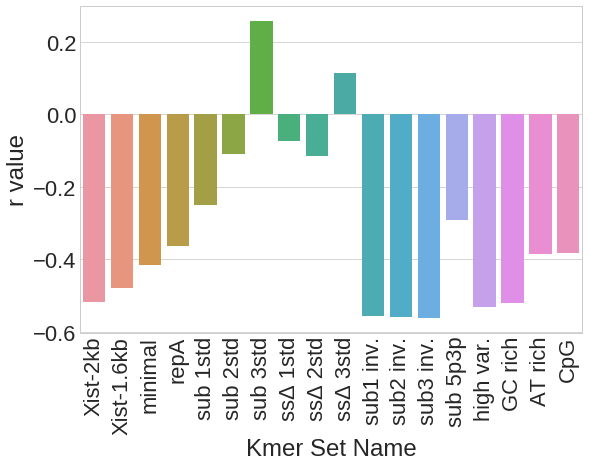

In [63]:
sns.barplot(x=mutants_subsets.index, y='R_value', data=mutants_subsets)
plt.ylabel('r value')
plt.xticks(rotation=90)
outfile = '/home/jessime/Research/pics/paper/tetris_kmer_subsets.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [61]:
outfile = '/home/jessime/Research/papers/revisions/mutants_subsets.csv'
mutants_subsets.to_csv(outfile)

### Inverse kmers

I need to spend a little more time with these inverse sets. Why are they so well correlated? The first thing I want to do is validate that I still get that result.

In [72]:
kmer_set = '/home/jessime/Desktop/inverse_kmers_3std_kmers.csv'
with open(kmer_set) as kmer_set:
    kmer_set = set(kmer_set.read().strip().split(','))
kmer_set.remove('')    
print(len(kmer_set))

4047


In [74]:
pass_subset(kmer_set)

-0.5613764015190601

In [67]:
calc_p_val(4048, -0.561)

0.0

# Community Kmer stats 

This is on my to-do list, but Mauro reminded me of it and I think I still have all the data in memory from this calculation anyway, so it's pretty much perfect:

> Also if you haven’t yet, please make the supplemental table with average kmer profile per community and variance across the communities. Let me know when this is complete and again list the file name in our response to reviews for our records.

In [105]:
group_stats = group_counts.T
group_stats.columns = [1, 2, 3, 4, 5, 'Null']
group_stats = group_stats.join(group_std)
group_stats.head()

1         2         3         4         5      Null       std
AAAAAA  0.246712 -0.163179  0.148345 -0.036328 -0.181186 -0.065250  0.171741
AAAAAG  0.198355 -0.263691  0.211403  0.386210  0.145812 -0.059660  0.229698
AAAAAT  0.525262 -0.333799 -0.056434 -0.094413 -0.098625 -0.106877  0.288458
AAAAAC  0.246297 -0.188736  0.180667 -0.494077 -0.051552 -0.028361  0.267473
AAAAGA  0.154514 -0.272851  0.117589  0.425221 -0.006013 -0.028692  0.231734

In [108]:
!mkdir /home/jessime/Research/papers/revisions

In [110]:
outfile = '/home/jessime/Research/papers/revisions/community_kmer_stats.csv'
group_stats.to_csv(outfile)

All of this was for mouse, I need to do human as well. I'll move this name over too.

In [78]:
!mv /home/jessime/Research/papers/revisions/community_kmer_stats.csv /home/jessime/Research/papers/revisions/community_kmer_stats_M5.csv

We've got a few extra count names in this .csv file, since it has some doped in lncRNAs, but I'm aware of that, and it's fine. I'll drop them when I join with the groups.

In [79]:
v22_counts = '/home/jessime/Research/treeview/6mers01_v22_std3.csv'
v22_counts = pd.read_csv(v22_counts, index_col=0)

In [81]:
print(v22_counts.shape)

groups = '/home/jessime/Research/groups.csv'
groups = pd.read_csv(groups, index_col=0)
print(groups.shape)

group_counts = groups.join(v22_counts)
group_counts = group_counts[~group_counts.index.duplicated(keep='first')]
print(group_counts.shape)

group_counts = group_counts.groupby('Group').mean()
print(group_counts.shape)
group_counts.head()

(15962, 4096)
(15953, 1)
(15953, 4097)
(6, 4096)


AAAAAA    AAAAAG    AAAAAT    AAAAAC    AAAAGA    AAAAGG    AAAAGT  \
Group                                                                         
0      0.203794  0.267079  0.547647  0.278766  0.245133  0.087164  0.298596   
1     -0.278790 -0.339540 -0.438245 -0.305037 -0.358548 -0.188418 -0.269423   
2     -0.155866 -0.249273 -0.333878 -0.223022 -0.247498 -0.165532 -0.189843   
3     -0.040411 -0.156720 -0.157870 -0.123504 -0.156069 -0.156061 -0.094115   
4      1.203258  0.388768  1.012397  0.256436  0.173442  0.080878  0.009777   

         AAAAGC    AAAATA    AAAATG    ...       CCCCGT    CCCCGC    CCCCTA  \
Group                                  ...                                    
0      0.105466  0.524278  0.411799    ...    -0.167367 -0.261110 -0.102408   
1     -0.213652 -0.401397 -0.364360    ...     0.179832  0.200752  0.163738   
2     -0.145960 -0.324182 -0.289308    ...     0.385740  1.273003  0.096405   
3     -0.132555 -0.178155 -0.128317    ...    -0.103849 -0.157701 -0.058135   
4     -0.020538  0.665783 -0.026686    ...     0.329311 -0.170639 -0.069584   

         CCCCTG    CCCCTT    CCCCTC    CCCCCA    CCCCCG    CCCCCT    CCCCCC  
Group                                                                        
0     -0.294739 -0.138693 -0.277491 -0.271594 -0.207157 -0.218196 -0.127791  
1      0.572560  0.235332  0.532453  0.576541  0.226995  0.389631  0.278177  
2      0.220818  0.122341  0.471053  0.356307  0.881873  0.345781  0.384807  
3     -0.102567 -0.096749 -0.129997 -0.128300 -0.121058 -0.066087 -0.063308  
4     -0.173062 -0.167685 -0.198480 -0.134658 -0.154617 -0.148249 -0.105330  

[5 rows x 4096 columns]

In [82]:
group_std = pd.DataFrame(group_counts.std(axis=0), columns=['std'])

group_stats = group_counts.T
group_stats.columns = [1, 2, 3, 4, 5, 'Null']
group_stats = group_stats.join(group_std)
group_stats.head()

1         2         3         4         5      Null       std
AAAAAA  0.203794 -0.278790 -0.155866 -0.040411  1.203258 -0.095050  0.545033
AAAAAG  0.267079 -0.339540 -0.249273 -0.156720  0.388768  0.016310  0.291145
AAAAAT  0.547647 -0.438245 -0.333878 -0.157870  1.012397 -0.116575  0.569731
AAAAAC  0.278766 -0.305037 -0.223022 -0.123504  0.256436  0.005831  0.244748
AAAAGA  0.245133 -0.358548 -0.247498 -0.156069  0.173442  0.052140  0.242036

In [83]:
outfile = '/home/jessime/Research/papers/revisions/community_kmer_stats_v22.csv'
group_stats.to_csv(outfile)

# Clusters

I'm defining clusters from the heatmap. I've done this manually with treeview, but group 1 is split, so I downloaded them into two lists and will concat. them here:

In [84]:
!cat /home/jessime/Research/treeview/v22_clusters/1_list_a.txt \
/home/jessime/Research/treeview/v22_clusters/1_list_b.txt >\
/home/jessime/Research/treeview/v22_clusters/1_list.txt

From our meeting with Peter:

> We can do 5 independent chi-square tests (in-group vs. out-of-group) to show that the groups/communities are statistically similar. This should include a multiple testing correction.

For whatever reason, doing chi-square tests are a little tricky for me. Here's the logic:

$$\large{exp_{in} = N_{cluster} (\frac{N_{community}}{total})}$$

$$\large{exp_{out} = N_{!cluster} (\frac{N_{!community}}{total})}$$

$$\large{obs_{in} = \{community\} \cup \{cluster\}}$$

$$\large{obs_{out} = \{!community\} \cup \{!cluster\}}$$

In [117]:
class ClusterComm:
    
    def __init__(self, n, annotation='v22'):
        self.n = n
        self.annotation = annotation
        
        self.lncRNAs = self.read_lncRNAs()
        self.comm = self.get_comm()
        self.cluster = self.read_cluster()
        self.out_comm, self.out_cluster = self.outs()
        self.observed = self.calc_observed()
        self.expected = self.calc_expected()
        self.p_value = self.chisquare()
        
    def __repr__(self):
        string = (f'Observed: {self.observed}\n'
                  f'Expected: {self.expected}\n'
                  f'p-value: {self.p_value}\n')
        return string
        
    def read_lncRNAs(self):
        """Return all lncRNAs"""
        filename = 'groups' if self.annotation == 'v22' else 'groups_M5'
        filename = f'/home/jessime/Research/{filename}.csv'
        lncRNAs = pd.read_csv(filename, index_col=0)
        return lncRNAs

    def read_cluster(self):
        """Return the set of lncRNAs in a cluster"""
        cluster = f'/home/jessime/Research/treeview/{self.annotation}_clusters/{self.n}_list.txt'
        with open(cluster) as cluster:
            cluster = set(cluster.read().split('\n'))
        return cluster
    
    def get_comm(self):
        """Return the set of lncRNAs in a community"""
        return set(self.lncRNAs[self.lncRNAs['Group'] == self.n].index)
    
    def outs(self):
        out_comm = set(self.lncRNAs[self.lncRNAs['Group'] != self.n].index)
        out_cluster = set(self.lncRNAs[~self.lncRNAs.index.isin(self.cluster)].index)

        return out_comm, out_cluster
    
    def calc_observed(self):
        """Get the observed overlap for in/out groups"""
        obs_in = len(self.comm & self.cluster)
        obs_out = len(self.out_comm & self.out_cluster)
        
        return np.array([obs_in, obs_out])
    
    def calc_expected(self):
        """Get the expected overlap for in/out groups"""
        n = len(self.lncRNAs)
        exp_in = len(self.cluster) * (len(self.comm) / n)
        exp_out = len(self.out_cluster) * (len(self.out_comm) / n)
        
        return np.array([exp_in, exp_out])
    
    def chisquare(self):
        return chisquare(self.observed, self.expected, ddof=1)[1]

In [118]:
for i in range(5):
    print(i)
    print(ClusterComm(i))
    print()

0
Observed: [ 2784 10586]
Expected: [  972.08675484  8773.3295305 ]
p-value: nan


1
Observed: [ 1296 13492]
Expected: [   220.20635617  12416.08023569]
p-value: nan


2
Observed: [ 1202 13788]
Expected: [   176.26778662  12761.98194697]
p-value: nan


3
Observed: [  796 14621]
Expected: [    70.96495957  13895.89619507]
p-value: nan


4
Observed: [  536 14960]
Expected: [    36.77270733  14460.62659061]
p-value: nan




Now I can get things set up for mouse:

In [119]:
for i in range(5):
    print(i)
    print(ClusterComm(i, 'M5'))
    print()

0
Observed: [1557 6139]
Expected: [  408.31400849  4988.77816859]
p-value: nan


1
Observed: [ 751 6764]
Expected: [  148.29884779  6160.83347483]
p-value: nan


2
Observed: [ 156 7094]
Expected: [   47.31109763  6985.25530625]
p-value: nan


3
Observed: [ 326 7918]
Expected: [   12.96895088  7604.92929048]
p-value: nan


4
Observed: [  42 7988]
Expected: [  2.06476653e+00   7.94805555e+03]
p-value: nan




## Repressive similarity

Are repressive/activating lncRNAs actually more similar than random?

I'm going to start with human repressors

In [7]:
v22_counts = '/home/jessime/Research/treeview/6mers01_v22_std3.csv'
v22_counts = pd.read_csv(v22_counts, index_col=0)
print(v22_counts.shape)

(15962, 4096)


In [35]:
v22_repressors = ['BDNF-AS-001', 
'CDKN2B-AS1-001', 
'KCNQ1OT1-001', 
'SCAANT1-001',
'TSIX-001',
'XIST-001',
'UBE3A-ATS',
'MORRBID_MIR4435-2HG',
'NESPAS_unspliced'
]

In [38]:
v22_repressor_counts = v22_counts.loc[v22_repressors]
v22_repressor_counts

AAAAAA    AAAAAG    AAAAAT    AAAAAC    AAAAGA  \
BDNF-AS-001          0.386670 -0.025326  0.264612  0.160057 -0.088566   
CDKN2B-AS1-001       0.093095  0.321178  2.317427 -0.531542 -0.610098   
KCNQ1OT1-001         0.523901  0.434787  0.711385  0.774896  0.669793   
SCAANT1-001         -0.425701 -0.606175  2.044914 -0.531542 -0.610098   
TSIX-001             0.327629  0.345722  0.357465  0.187196  0.411359   
XIST-001             0.135688 -0.115580  0.370720 -0.212922 -0.209648   
UBE3A-ATS            0.423364  0.146745  0.502511  0.226889  0.084747   
MORRBID_MIR4435-2HG -0.425701 -0.606175 -0.671423  0.140972  0.404182   
NESPAS_unspliced    -0.042297 -0.068655 -0.324938 -0.051535 -0.127470   

                       AAAAGG    AAAAGT    AAAAGC    AAAATA    AAAATG  \
BDNF-AS-001         -0.528997  0.243558 -0.510077  0.316009  1.108587   
CDKN2B-AS1-001      -0.528997  1.882756 -0.510077  2.442550  0.294265   
KCNQ1OT1-001         0.313569  0.196045  0.367175  0.418753  0.304704   
SCAANT1-001         -0.528997  3.834180 -0.510077 -0.653643 -0.632096   
TSIX-001             0.282196  0.243013  0.150904  0.140892  0.156438   
XIST-001            -0.139425 -0.044753 -0.147296 -0.020791  0.303493   
UBE3A-ATS           -0.000841  0.157605 -0.095345  0.276792  0.078157   
MORRBID_MIR4435-2HG  0.880616 -0.503878 -0.510077 -0.653643 -0.632096   
NESPAS_unspliced    -0.059479  0.014882  0.182203 -0.272282 -0.175693   

                       ...       CCCCGT    CCCCGC    CCCCTA    CCCCTG  \
BDNF-AS-001            ...    -0.226408 -0.311190 -0.303475 -0.481332   
CDKN2B-AS1-001         ...    -0.226408 -0.311190 -0.303475 -0.481332   
KCNQ1OT1-001           ...    -0.035188 -0.202647 -0.037491  0.057046   
SCAANT1-001            ...    -0.226408 -0.311190 -0.303475 -0.481332   
TSIX-001               ...    -0.121208 -0.234413  0.190394 -0.354394   
XIST-001               ...    -0.226408 -0.163703  0.539827  0.067322   
UBE3A-ATS              ...    -0.065006 -0.255758 -0.121888 -0.152923   
MORRBID_MIR4435-2HG    ...    -0.226408 -0.311190 -0.303475 -0.481332   
NESPAS_unspliced       ...    -0.043739 -0.044559 -0.112907 -0.077237   

                       CCCCTT    CCCCTC    CCCCCA    CCCCCG    CCCCCT  \
BDNF-AS-001          0.546223 -0.455696  0.304769 -0.260158 -0.392508   
CDKN2B-AS1-001      -0.421082 -0.455696 -0.463159 -0.260158 -0.392508   
KCNQ1OT1-001        -0.030644 -0.084384 -0.004415 -0.104293 -0.120615   
SCAANT1-001         -0.421082 -0.455696 -0.463159  6.743612 -0.392508   
TSIX-001             0.042886 -0.271846 -0.217601 -0.163690 -0.234127   
XIST-001             1.584288  0.191789  0.362338 -0.167501  0.292051   
UBE3A-ATS           -0.072141 -0.326644 -0.158439 -0.181802 -0.194777   
MORRBID_MIR4435-2HG  0.519530 -0.455696 -0.463159 -0.260158 -0.392508   
NESPAS_unspliced     0.518824 -0.030046  0.247485 -0.036815  0.020012   

                       CCCCCC  
BDNF-AS-001          0.658050  
CDKN2B-AS1-001      -0.251449  
KCNQ1OT1-001        -0.031186  
SCAANT1-001         -0.251449  
TSIX-001            -0.106036  
XIST-001             0.726233  
UBE3A-ATS           -0.128963  
MORRBID_MIR4435-2HG -0.251449  
NESPAS_unspliced     0.043130  

[9 rows x 4096 columns]

In [41]:
v22_repressor_corr = pd.DataFrame(np.corrcoef(v22_repressor_counts),
                                  v22_repressors,
                                  v22_repressors)
v22_repressor_corr

BDNF-AS-001  CDKN2B-AS1-001  KCNQ1OT1-001  SCAANT1-001  \
BDNF-AS-001             1.000000        0.041924      0.074945     0.011983   
CDKN2B-AS1-001          0.041924        1.000000      0.154605    -0.009213   
KCNQ1OT1-001            0.074945        0.154605      1.000000    -0.036523   
SCAANT1-001             0.011983       -0.009213     -0.036523     1.000000   
TSIX-001                0.084556        0.155084      0.391547    -0.058259   
XIST-001                0.019867        0.074828      0.082960    -0.040971   
UBE3A-ATS               0.131352        0.193650      0.311028    -0.042075   
MORRBID_MIR4435-2HG    -0.008129        0.010538      0.089756     0.003723   
NESPAS_unspliced       -0.003693       -0.036381     -0.087087    -0.039758   

                     TSIX-001  XIST-001  UBE3A-ATS  MORRBID_MIR4435-2HG  \
BDNF-AS-001          0.084556  0.019867   0.131352            -0.008129   
CDKN2B-AS1-001       0.155084  0.074828   0.193650             0.010538   
KCNQ1OT1-001         0.391547  0.082960   0.311028             0.089756   
SCAANT1-001         -0.058259 -0.040971  -0.042075             0.003723   
TSIX-001             1.000000  0.286038   0.586463             0.034705   
XIST-001             0.286038  1.000000   0.385035            -0.007365   
UBE3A-ATS            0.586463  0.385035   1.000000            -0.025702   
MORRBID_MIR4435-2HG  0.034705 -0.007365  -0.025702             1.000000   
NESPAS_unspliced     0.025338  0.004878   0.094930            -0.009179   

                     NESPAS_unspliced  
BDNF-AS-001                 -0.003693  
CDKN2B-AS1-001              -0.036381  
KCNQ1OT1-001                -0.087087  
SCAANT1-001                 -0.039758  
TSIX-001                     0.025338  
XIST-001                     0.004878  
UBE3A-ATS                    0.094930  
MORRBID_MIR4435-2HG         -0.009179  
NESPAS_unspliced             1.000000

In [46]:
n = len(v22_repressor_corr)
v22_repressor_corr = v22_repressor_corr.values[np.triu_indices(n, k=1, m=n)]
v22_repressor_corr

array([ 0.04192366,  0.07494535,  0.01198256,  0.08455558,  0.01986747,
        0.13135225, -0.00812923, -0.00369255,  0.15460527, -0.00921276,
        0.15508437,  0.07482835,  0.19364964,  0.01053811, -0.03638066,
       -0.03652256,  0.39154657,  0.08295996,  0.31102765,  0.0897555 ,
       -0.0870873 , -0.05825913, -0.04097091, -0.04207473,  0.00372331,
       -0.03975766,  0.28603784,  0.58646273,  0.03470451,  0.02533764,
        0.38503506, -0.00736527,  0.00487771, -0.02570154,  0.09492992,
       -0.00917928])

In [47]:
v22_repressor_corr.mean()

0.079038817978075895

In [2]:
def random_corrs(counts, size):
    index = np.random.randint(0, len(counts), size=size)
    subset = counts.iloc[index]
    sim = np.corrcoef(subset)
    sim = sim[np.triu_indices_from(sim, 1)]
    return sim.mean()

def sim_perm_test(counts, size, observed):
    out = sum(1 if random_corrs(counts, size) > observed else 0 for i in range(10000))
    return out / 10000

In [51]:
p_val = sim_perm_test(v22_counts, 9, v22_repressor_corr.mean())
p_val

0.0

In [57]:
v22_activators = ['DBET-001',
 'HOTAIRM1-001',
 'HOTTIP-001',
 'LINC00570-001',
 'PCAT6-001',
 'PVT1-001']

In [58]:
v22_activator_counts = v22_counts.loc[v22_activators]
v22_activator_counts

AAAAAA    AAAAAG    AAAAAT    AAAAAC    AAAAGA    AAAAGG  \
DBET-001       0.003312 -0.350553 -0.259489  0.077180 -0.380580 -0.528997   
HOTAIRM1-001   0.291025  1.956138 -0.671423 -0.531542  1.690548 -0.528997   
HOTTIP-001     0.508829  0.164817  0.363952  0.080456  0.082160  1.074464   
LINC00570-001  0.659088  0.040183  0.370180  0.238057 -0.029747 -0.528997   
PCAT6-001     -0.425701 -0.606175 -0.671423 -0.531542 -0.610098 -0.528997   
PVT1-001      -0.425701 -0.606175 -0.671423  1.703319 -0.610098 -0.528997   

                 AAAAGT    AAAAGC    AAAATA    AAAATG    ...       CCCCGT  \
DBET-001      -0.503878  0.529563 -0.440279 -0.632096    ...     0.352724   
HOTAIRM1-001   2.793305  1.226788 -0.653643  0.647691    ...    -0.226408   
HOTTIP-001    -0.503878 -0.161666 -0.439131 -0.375374    ...     0.355840   
LINC00570-001 -0.503878  1.242459 -0.114137 -0.632096    ...    -0.226408   
PCAT6-001     -0.503878 -0.510077 -0.653643 -0.632096    ...    -0.226408   
PVT1-001       1.911416 -0.510077 -0.653643 -0.632096    ...    -0.226408   

                 CCCCGC    CCCCTA    CCCCTG    CCCCTT    CCCCTC    CCCCCA  \
DBET-001       2.224780  0.300697  0.916271  0.004613  1.568516  0.888649   
HOTAIRM1-001   3.925504 -0.303475 -0.481332 -0.421082  1.235170  1.230631   
HOTTIP-001     0.113746  1.518794  0.221230  0.434889  0.561856  0.895924   
LINC00570-001 -0.311190  1.224216 -0.481332 -0.421082 -0.455696  0.391377   
PCAT6-001      3.489374  5.129224  1.089570 -0.421082  2.577916  2.575699   
PVT1-001      -0.311190  4.132833 -0.481332 -0.421082 -0.455696 -0.463159   

                 CCCCCG    CCCCCT    CCCCCC  
DBET-001       3.988338  1.787240  8.554173  
HOTAIRM1-001   2.401483  1.792437  3.760650  
HOTTIP-001    -0.260158  0.922378  0.150960  
LINC00570-001 -0.260158 -0.392508 -0.251449  
PCAT6-001      2.127491  3.527542 -0.251449  
PVT1-001       3.639321 -0.392508 -0.251449  

[6 rows x 4096 columns]

In [59]:
v22_activator_corr = pd.DataFrame(np.corrcoef(v22_activator_counts),
                                  v22_activators,
                                  v22_activators)
v22_activator_corr

DBET-001  HOTAIRM1-001  HOTTIP-001  LINC00570-001  PCAT6-001  \
DBET-001       1.000000      0.129901    0.159509       0.003176   0.198975   
HOTAIRM1-001   0.129901      1.000000    0.068005       0.027464   0.097843   
HOTTIP-001     0.159509      0.068005    1.000000      -0.036243   0.063434   
LINC00570-001  0.003176      0.027464   -0.036243       1.000000  -0.011785   
PCAT6-001      0.198975      0.097843    0.063434      -0.011785   1.000000   
PVT1-001       0.129967     -0.005136    0.078127      -0.037349   0.040825   

               PVT1-001  
DBET-001       0.129967  
HOTAIRM1-001  -0.005136  
HOTTIP-001     0.078127  
LINC00570-001 -0.037349  
PCAT6-001      0.040825  
PVT1-001       1.000000

In [62]:
v22_activator_mean = v22_activator_corr.values[np.triu_indices_from(v22_activator_corr, 1)].mean()
v22_activator_mean

0.060447483620834234

In [63]:
p_val = sim_perm_test(v22_counts, 6, v22_activator_mean)
p_val

0.0014

## Mouse repeat

In [132]:
M5_counts = '/home/jessime/Research/treeview/6mers01_M5_extend3_norm.csv'
M5_counts = pd.read_csv(M5_counts, index_col=0)
print(M5_counts.shape)

(8257, 4096)


In [136]:
new_index = [n.split('|')[4] for n in M5_counts.index.values]
M5_counts.index = new_index

In [149]:
M5_repressors = ['Airn88-201', 
'Kcnq1ot1-001', 
'Tsix-201',
'Xist-001',
'Ube3a_long-201',
'Haunt-001',
'Morrbid-001',
'Nespas-001'
]

M5_repressor_counts = M5_counts.loc[M5_repressors]
M5_repressor_counts

AAAAAA    AAAAAG    AAAAAT    AAAAAC    AAAAGA    AAAAGG  \
Airn88-201      0.589182  0.091169  0.246803  0.398872  0.266739 -0.135059   
Kcnq1ot1-001    0.635644  0.961324  1.172555  0.735299  0.722059  0.371753   
Tsix-201        0.438644  0.130075  0.290266 -0.018789  0.169398  0.021032   
Xist-001       -0.050602 -0.155892 -0.343419 -0.082488 -0.201434  0.145861   
Ube3a_long-201  0.113515  0.340428  0.253245  0.116379 -0.032566 -0.001162   
Haunt-001      -0.258456  1.607651 -0.388170  0.141925  1.466993  0.952482   
Morrbid-001    -0.326365 -0.649480 -0.690410  0.288404 -0.336046 -0.123916   
Nespas-001     -0.431601  0.219237 -0.690410  1.292982  0.056896  0.447661   

                  AAAAGT    AAAAGC    AAAATA    AAAATG    ...       CCCCGT  \
Airn88-201      0.001699 -0.029719 -0.075069  0.278499    ...     0.184779   
Kcnq1ot1-001    0.634551  0.299338  0.635919  0.601657    ...    -0.084832   
Tsix-201       -0.135950  0.084335  0.102442  1.012377    ...     0.172086   
Xist-001        0.001493 -0.165864  0.051571  0.766193    ...    -0.057534   
Ube3a_long-201  0.154491  0.101429  0.072039  0.559450    ...    -0.190043   
Haunt-001       0.283928  1.035467  0.969040  0.370685    ...    -0.230508   
Morrbid-001    -0.051448 -0.543529 -0.352645 -0.212783    ...    -0.230508   
Nespas-001     -0.571174 -0.543529 -0.688449 -0.610256    ...    -0.230508   

                  CCCCGC    CCCCTA    CCCCTG    CCCCTT    CCCCTC    CCCCCA  \
Airn88-201     -0.123086  0.127397  0.046342 -0.021686  0.137671  0.059007   
Kcnq1ot1-001   -0.255233  0.014410 -0.064419 -0.120917 -0.146982 -0.161482   
Tsix-201       -0.180420  0.047799 -0.233583 -0.220954 -0.068983 -0.100148   
Xist-001       -0.180182 -0.081958  0.341689  0.035807  0.485133 -0.178141   
Ube3a_long-201 -0.265983 -0.154830 -0.163966  0.209098 -0.332145 -0.309301   
Haunt-001      -0.275250  0.339834  0.378825  0.559639 -0.050121 -0.081294   
Morrbid-001    -0.275250 -0.343439 -0.479246  0.165784  0.038909  0.007696   
Nespas-001     -0.275250 -0.343439 -0.479246  0.908167 -0.463083  0.618009   

                  CCCCCG    CCCCCT    CCCCCC  
Airn88-201     -0.018349  0.104077  0.007696  
Kcnq1ot1-001   -0.228216 -0.166992  0.055723  
Tsix-201       -0.168236 -0.091723  0.098755  
Xist-001        0.007962  0.537544 -0.130283  
Ube3a_long-201 -0.232848 -0.050476 -0.166903  
Haunt-001      -0.256005  0.087507 -0.216469  
Morrbid-001    -0.256005 -0.405175  0.057297  
Nespas-001     -0.256005 -0.405175 -0.216469  

[8 rows x 4096 columns]

In [150]:
M5_repressor_corr = pd.DataFrame(np.corrcoef(M5_repressor_counts),
                                  M5_repressors,
                                  M5_repressors)
M5_repressor_corr

Airn88-201  Kcnq1ot1-001  Tsix-201  Xist-001  Ube3a_long-201  \
Airn88-201        1.000000      0.383094  0.145357  0.026587        0.109775   
Kcnq1ot1-001      0.383094      1.000000  0.231474  0.139385        0.350678   
Tsix-201          0.145357      0.231474  1.000000  0.131476        0.252835   
Xist-001          0.026587      0.139385  0.131476  1.000000        0.205371   
Ube3a_long-201    0.109775      0.350678  0.252835  0.205371        1.000000   
Haunt-001         0.076221      0.088027  0.022800 -0.024155       -0.005694   
Morrbid-001       0.044988      0.023782  0.000522  0.023360        0.027482   
Nespas-001       -0.006664     -0.083630 -0.031516 -0.063464       -0.075652   

                Haunt-001  Morrbid-001  Nespas-001  
Airn88-201       0.076221     0.044988   -0.006664  
Kcnq1ot1-001     0.088027     0.023782   -0.083630  
Tsix-201         0.022800     0.000522   -0.031516  
Xist-001        -0.024155     0.023360   -0.063464  
Ube3a_long-201  -0.005694     0.027482   -0.075652  
Haunt-001        1.000000    -0.004300    0.020269  
Morrbid-001     -0.004300     1.000000    0.007633  
Nespas-001       0.020269     0.007633    1.000000

In [151]:
M5_repressor_mean = M5_repressor_corr.values[np.triu_indices_from(M5_repressor_corr, 1)].mean()
M5_repressor_mean

0.072001521554500236

In [152]:
sim_perm_test(M5_counts, 8, M5_repressor_mean)

0.0011

I have to get new mouse activators before I can do anything. These are all from Mauro's functional_lncRNAs_regulatory_lncRNAs_list file. I need `XistAR` and `Upperhand`.

In [157]:
%aimport fasta_reader

In [163]:
xist = '/home/jessime/Research/indv_seqs/M5_XKA.fa'
xist = fasta_reader.Reader(xist).get_seqs()[0]

In [185]:
xistAR = str(Seq(xist[13:2802]).reverse_complement())

outfile = '/home/jessime/Research/indv_seqs/xistAR.fa'
with open(outfile, 'w') as outfile:
    outfile.write(f'>||||XistAR-201||{len(xistAR)}|\n{xistAR}\n')


Upperhand is actually included in M14:

In [183]:
!grep -A 12 "ENSMUST00000186386.6" /home/jessime/Research/M14_full_unspliced.fa >\
/home/jessime/Research/indv_seqs/upperhand.fa

In [187]:
!cat /home/jessime/Research/M5_transcripts01_extend3.fa \
/home/jessime/Research/indv_seqs/xistAR.fa \
/home/jessime/Research/indv_seqs/upperhand.fa >\
/home/jessime/Research/M5_transcripts01_extend4.fa

In [197]:
M5_activators = ['Hottip-001',
                 'Gm16084-001',
                 'Gm13261-001',
                 'XistAR-201',
                 'Upperhand-201'
]

In [189]:
%aimport kmer_counts

In [190]:
%aimport fasta

In [198]:
infasta = '/home/jessime/Research/M5_transcripts01_extend4.fa'
names = fasta.Extracter(infasta).get_names('common')

counter = kmer_counts.BasicCounter(infasta)
counter.get_counts()
M5_counts = pd.DataFrame(counter.counts, names, counter.kmers)
print(counts.shape)

A Jupyter Widget


(8259, 4096)


In [199]:
M5_activator_counts = M5_counts.loc[M5_activators]
M5_activator_counts

AAAAAA    AAAAAG    AAAAAT    AAAAAC    AAAAGA    AAAAGG  \
Hottip-001    -0.055760 -0.182283 -0.252713  0.447157 -0.273986 -0.033551   
Gm16084-001   -0.431920 -0.649568 -0.690405 -0.537583 -0.659163 -0.593852   
Gm13261-001   -0.143530 -0.649568 -0.690405  0.594868 -0.659163 -0.593852   
XistAR-201     3.154082  1.708809  3.727633 -0.537583  0.960816  0.348756   
Upperhand-201  1.768760 -0.649568  0.589927  0.902691 -0.659163 -0.593852   

                 AAAAGT    AAAAGC    AAAATA    AAAATG    ...       CCCCGT  \
Hottip-001    -0.571159  0.028529 -0.288254 -0.136462    ...     1.078852   
Gm16084-001   -0.571159 -0.543594 -0.688652 -0.610349    ...    -0.230760   
Gm13261-001   -0.571159  0.772289 -0.688652 -0.610349    ...    -0.230760   
XistAR-201    -0.049886  0.900150  0.658545  1.382727    ...     3.074026   
Upperhand-201 -0.571159 -0.543594  0.482587 -0.610349    ...    -0.230760   

                 CCCCGC    CCCCTA    CCCCTG    CCCCTT    CCCCTC    CCCCCA  \
Hottip-001     0.444744  1.637292 -0.479153  1.011018  2.529739  0.104008   
Gm16084-001   -0.275338 -0.343508 -0.479153 -0.444506 -0.463013 -0.494240   
Gm13261-001    1.380851 -0.343508 -0.479153 -0.444506  0.913653 -0.494240   
XistAR-201     0.936073  0.489578 -0.479153 -0.444506 -0.463013  0.008983   
Upperhand-201 -0.275338 -0.343508 -0.479153 -0.444506 -0.463013  1.255746   

                 CCCCCG    CCCCCT    CCCCCC  
Hottip-001     1.743367  1.737087  0.109871  
Gm16084-001   -0.256055 -0.405092 -0.216547  
Gm13261-001   -0.256055 -0.405092 -0.216547  
XistAR-201     0.584863 -0.405092 -0.216547  
Upperhand-201 -0.256055 -0.405092  0.738286  

[5 rows x 4096 columns]

In [200]:
M5_activator_corr = pd.DataFrame(np.corrcoef(M5_activator_counts),
                                  M5_activators,
                                  M5_activators)
M5_activator_corr

Hottip-001  Gm16084-001  Gm13261-001  XistAR-201  Upperhand-201
Hottip-001       1.000000     0.023069     0.022487    0.013380      -0.016715
Gm16084-001      0.023069     1.000000    -0.017189   -0.015962       0.005553
Gm13261-001      0.022487    -0.017189     1.000000    0.041075       0.027603
XistAR-201       0.013380    -0.015962     0.041075    1.000000       0.025460
Upperhand-201   -0.016715     0.005553     0.027603    0.025460       1.000000

In [201]:
M5_activator_mean = M5_activator_corr.values[np.triu_indices_from(M5_activator_corr, 1)].mean()
print(M5_activator_mean)
sim_perm_test(M5_counts, 5, M5_activator_mean)

0.0108759919045


0.1592

In [210]:
data = [['human', 'cis-repress', 9, 0.079038817978075895, '<0.0001'],
        ['human', 'cis-activate', 6, v22_activator_mean, '0.0014'],
        ['mouse', 'cis-repress', 8, M5_repressor_mean, '0.0011'],
        ['mouse', 'cis-activate', 5, M5_activator_mean, '0.1592']]

results_df = pd.DataFrame(data=data,
                          columns=['species', 'function', 'count', 'mean', 'p-value'])
results_df

species      function  count      mean  p-value
0   human   cis-repress      9  0.079039  <0.0001
1   human  cis-activate      6  0.060447   0.0014
2   mouse   cis-repress      8  0.072002   0.0011
3   mouse  cis-activate      5  0.010876   0.1592

In [211]:
outfile = '/home/jessime/Research/papers/revisions/functional_similar_p-vals.csv'
results_df.to_csv(outfile)

# RNA IP

This is an aside:

> Attached is a .fa file of top peaks for 8 RNA IP datasets. There are about 7500 seqs:
>  
> sm33_ez_f
> tsc_ctcf                
> tsc_ezh2              
> tsc_nxf1               
> tsc_ring1b           
> tsc_sfpq
> tsc_spen                               
> tsc_suz12
>  
> Can you cluster the sequences (relative to each other) and generate an image like the hierarchical cluster in our Figs 2A and B – instead of coloring the location of lncRNAs from various communities on the righthand y-axis, you would color code the 8 RNA IPs. The hope is that IPs of a feather cluster together.
 
> I’ll come talk in person about this now.

> Thank you

> Mauro

In [66]:
%aimport kmer_counts

In [71]:
infasta = '/home/jessime/Research/for_others/rnaip.t1000.fa'
outfile = '/home/jessime/Research/treeview/rnaip.t1000.csv'

counter = kmer_counts.BasicCounter(infasta, outfile, binary=False, label=True)
counts = counter.make_count_file()
counts.std(axis=1).mean()

A Jupyter Widget

0.94716364

In [79]:
def grab_protein(string):
    ls = string.strip('>').split('_')
    n = 3 if ls[0] == 'sm33' else 2
    return '_'.join(ls[:n])

with open(infasta) as fa:
    proteins = [grab_protein(l) for l in fa.readlines() if l[0] == '>']

In [80]:
print(proteins[:5])
print(proteins[-5:])
print(len(proteins))

['sm33_ez_f', 'sm33_ez_f', 'sm33_ez_f', 'sm33_ez_f', 'sm33_ez_f']
['tsc_suz12', 'tsc_suz12', 'tsc_suz12', 'tsc_suz12', 'tsc_suz12']
7419


In [89]:
with open(infasta) as fa:
    name_protein_map = dict(zip((l.strip('\n') for l in fa.readlines() if l[0] == '>'), proteins))
    
name_protein_map['>tsc_ctcf_macs_peak_27241_Ehd1']

'tsc_ctcf'

In [125]:
lnc_list = '/home/jessime/Research/treeview/rnaip.t1000_list.txt'
with open(lnc_list) as lnc_list:
    lnc_list = lnc_list.read().splitlines()
    
protein_index_map = defaultdict(set)

for i, lnc in enumerate(lnc_list):
    protein = name_protein_map[lnc]
    protein_index_map[protein].add(len(lnc_list) - i)
    #protein_index_map[protein].add(i)
    
outfile = '/home/jessime/Research/treeview/rnaip.t1000.protein_index.pkl'
pickle.dump(protein_index_map, open(outfile, 'wb'))

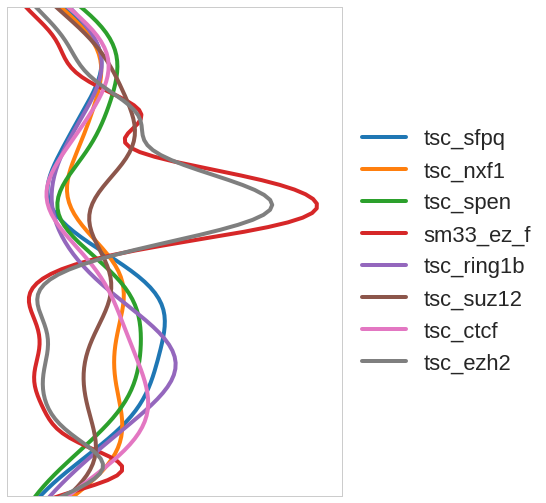

In [130]:
plt.rcParams['figure.figsize'] = [6.0, 9.0]

for protein, indices in protein_index_map.items():
    sns.distplot(list(indices), kde_kws={'linewidth': 4}, hist=False, vertical=True, label=protein)

plt.ylim((0, len(lnc_list)))
plt.xlim((0, .00045))
plt.xticks([])
plt.yticks([])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

outfile = '/home/jessime/Research/pics/rnaip.t1000.distros.png'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

# R distributions

[R1C2] Distributions of R values for each of the communities.

In [74]:
%aimport kmer_counts

In [75]:
v22_groups = '/home/jessime/Research/groups.csv'
v22_groups = pd.read_csv(v22_groups, index_col=0).values

infasta = '/home/jessime/Research/v22_transcripts01.fa'
counter = kmer_counts.BasicCounter(infasta)
counter.get_counts()
v22_counts = counter.counts

A Jupyter Widget

In [107]:
def r_val_distro(subset, full=False):
    sim = np.corrcoef(subset)
    sim = sim[np.triu_indices_from(sim, 1)]
    if not full:
        sim = sim[np.where(sim > .13)]
    return sim

def distros_df(counts, groups, full=False):
    r_vals = [r_val_distro(counts[(groups == i).squeeze()], full) for i in range(6)]
    groups = [np.ones(len(ls))*i for i, ls in enumerate(r_vals)]
    r_vals = np.concatenate(r_vals)
    groups = np.concatenate(groups)
    df = np.vstack((r_vals, groups)).T
    df = pd.DataFrame(df, columns=['R_vals', 'Groups'])
    return df

In [108]:
df = distros_df(v22_counts, v22_groups)

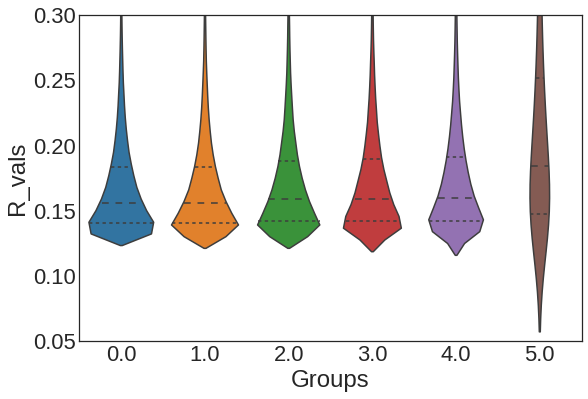

In [109]:
sns.violinplot('Groups', 'R_vals', data=df, inner='quartile')
plt.ylim((0.05, .3))

outfile = '/home/jessime/Research/pics/Comm_r-val_distros_v22.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [97]:
summary = df.groupby('Groups').describe()
summary

R_vals                                                              \
           count      mean       std       min       25%       50%       75%   
Groups                                                                         
0.0     294126.0  0.168873  0.041010  0.130000  0.140870  0.156378  0.183635   
1.0     108281.0  0.169531  0.044483  0.130000  0.140784  0.156329  0.183739   
2.0     120144.0  0.172299  0.045370  0.130000  0.141963  0.158815  0.187880   
3.0      36378.0  0.173194  0.046322  0.130000  0.141937  0.159443  0.189444   
4.0      23268.0  0.174957  0.052682  0.130001  0.142156  0.160006  0.191176   
5.0       3841.0  0.250576  0.189626  0.130011  0.147815  0.184177  0.252148   

             
        max  
Groups       
0.0     1.0  
1.0     1.0  
2.0     1.0  
3.0     1.0  
4.0     1.0  
5.0     1.0

In [98]:
outfile = '/home/jessime/Research/papers/revisions/community_R_stats_v22.csv'
summary.to_csv(outfile)

In [110]:
df = distros_df(v22_counts, v22_groups, full=True)

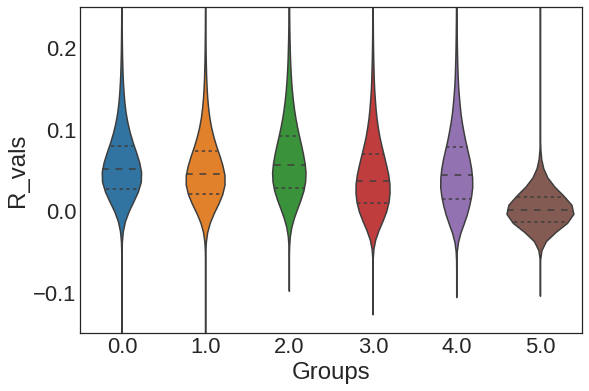

In [113]:
sns.violinplot('Groups', 'R_vals', data=df, inner='quartile')
plt.ylim((-.15, .25))

outfile = '/home/jessime/Research/pics/Comm_r-val_distros_v22_full.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [112]:
summary = df.groupby('Groups').describe()
outfile = '/home/jessime/Research/papers/revisions/community_R_stats_v22_full.csv'
summary.to_csv(outfile)
summary

R_vals                                                    \
             count      mean       std       min       25%       50%   
Groups                                                                 
0.0      4558690.0  0.057461  0.045307 -0.190706  0.027255  0.051218   
1.0      2023066.0  0.051502  0.045258 -0.150670  0.021266  0.045460   
2.0      1154440.0  0.064645  0.052511 -0.092085  0.028473  0.056738   
3.0       601156.0  0.044857  0.050794 -0.120158  0.009614  0.037100   
4.0       301476.0  0.051807  0.053777 -0.097609  0.014811  0.044227   
5.0     28324101.0  0.002546  0.022571 -0.103126 -0.013025  0.001257   

                       
             75%  max  
Groups                 
0.0     0.080036  1.0  
1.0     0.074169  1.0  
2.0     0.091691  1.0  
3.0     0.070466  1.0  
4.0     0.079035  1.0  
5.0     0.016700  1.0

In [118]:
294126.0/4558690.0

0.06451985109757408

Have to repeat for mouse, of course.

In [99]:
M5_groups = '/home/jessime/Research/groups_M5.csv'
M5_groups = pd.read_csv(M5_groups, index_col=0).values


infasta = '/home/jessime/Research/M5_transcripts01.fa'
counter = kmer_counts.BasicCounter(infasta)
counter.get_counts()
M5_counts = counter.counts

A Jupyter Widget

In [100]:
df = distros_df(M5_counts, M5_groups)

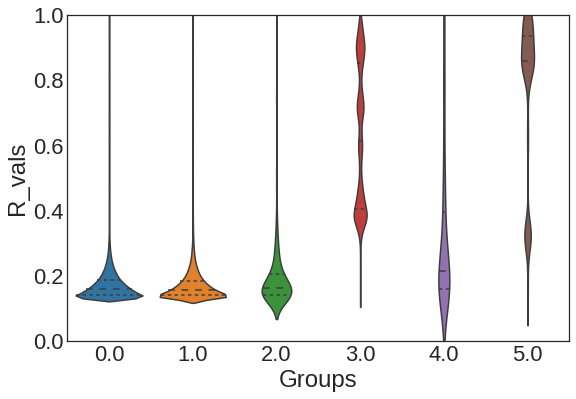

In [103]:
sns.violinplot('Groups', 'R_vals', data=df, inner='quartile')
plt.ylim((0, 1))

outfile = '/home/jessime/Research/pics/Comm_r-val_distros_M5.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [104]:
summary = df.groupby('Groups').describe()
outfile = '/home/jessime/Research/papers/revisions/community_R_stats_M5.csv'
summary.to_csv(outfile)
summary

R_vals                                                              \
           count      mean       std       min       25%       50%       75%   
Groups                                                                         
0.0     179939.0  0.171413  0.041198  0.130000  0.142463  0.159674  0.187830   
1.0      41759.0  0.170687  0.050952  0.130002  0.141074  0.156758  0.184611   
2.0       1251.0  0.206210  0.128351  0.130008  0.142694  0.163965  0.206761   
3.0      52939.0  0.626296  0.217448  0.154303  0.405160  0.615454  0.853925   
4.0        240.0  0.322809  0.238009  0.131478  0.160909  0.216636  0.395374   
5.0       9844.0  0.759579  0.254492  0.130066  0.636614  0.859397  0.935085   

             
        max  
Groups       
0.0     1.0  
1.0     1.0  
2.0     1.0  
3.0     1.0  
4.0     1.0  
5.0     1.0

In [114]:
df = distros_df(M5_counts, M5_groups, full=True)

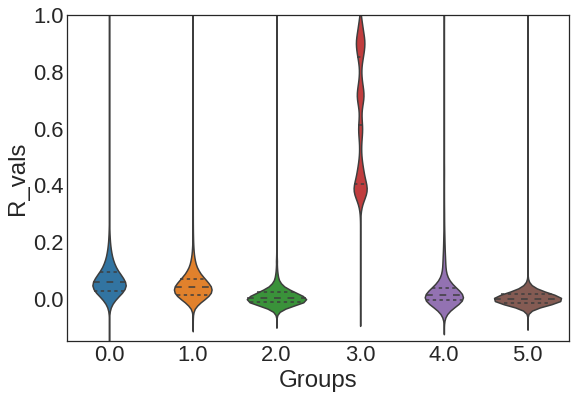

In [117]:
sns.violinplot('Groups', 'R_vals', data=df, inner='quartile')
plt.ylim((-.15, 1))

outfile = '/home/jessime/Research/pics/Comm_r-val_distros_M5_full.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [116]:
summary = df.groupby('Groups').describe()
outfile = '/home/jessime/Research/papers/revisions/community_R_stats_M5_full.csv'
summary.to_csv(outfile)
summary

R_vals                                                              \
            count      mean       std       min       25%       50%       75%   
Groups                                                                          
0.0     1635336.0  0.064847  0.053742 -0.270808  0.028762  0.057961  0.092968   
1.0      817281.0  0.046428  0.047508 -0.108399  0.014680  0.040343  0.070522   
2.0      105570.0  0.008240  0.038190 -0.094601 -0.013053  0.003049  0.022082   
3.0       53301.0  0.622053  0.222715 -0.045121  0.403554  0.612356  0.853059   
4.0        2850.0  0.039649  0.114279 -0.078416 -0.005891  0.011544  0.037435   
5.0     9217071.0  0.002385  0.034307 -0.106471 -0.013824  0.000589  0.015978   

             
        max  
Groups       
0.0     1.0  
1.0     1.0  
2.0     1.0  
3.0     1.0  
4.0     1.0  
5.0     1.0

In [119]:
179939.0/1635336.0

0.11003182220656794

# Sub communities

[R1C2] Can each community be further partitioned into small communities or hierarchal clustering groups, where potential functions could be better predicted?

We are going to address this question using only communities 1 and 3, and test if subgroups within those communities have differing localizations.

First we have to get all the data collected.

In [7]:
localization = '/home/jessime/Research/localization/percent_nuc_stats.csv'
localization = pd.read_csv(localization, index_col=0)
localization.head()

GM12878_Non  GM12878_Poly  HepG2_Non  HepG2_Poly  K562_Non  \
Transcript                                                                      
RP11-34P13.3-001           NaN      0.904138        1.0    0.548567  1.000000   
FAM138A-001                NaN      0.485377        NaN         NaN  1.000000   
RP11-34P13.7-201           NaN      1.000000        1.0    0.342446  0.639072   
RP11-34P13.8-001           NaN           NaN        NaN         NaN       NaN   
RP11-34P13.14-001          0.0      1.000000        NaN    1.000000  0.751979   

                   K562_Poly      Mean       Std  
Transcript                                        
RP11-34P13.3-001    0.743043  0.839150  0.193419  
FAM138A-001         0.405495  0.630291  0.322659  
RP11-34P13.7-201    0.468262  0.689956  0.301975  
RP11-34P13.8-001         NaN       NaN       NaN  
RP11-34P13.14-001   0.344154  0.619227  0.437809

In [8]:
%aimport fasta

In [12]:
%aimport kmer_counts

In [9]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'
names = fasta.Extracter(infasta).get_names('common')

groups = '/home/jessime/Research/groups.csv'
groups = pd.read_csv(groups, index_col=0)

Let's make subgroups of group 2 first since it has the most distictive localization distribution.

In [13]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'
counter = kmer_counts.BasicCounter(infasta)
counter.get_counts()
v22_counts = counter.counts

group2 = v22_counts[groups['Group'] == 2]
print(len(group2))

A Jupyter Widget


1520


We need to make subgroups of this group.

In [14]:
%aimport network

The subgraph shoud be the whole graph.

In [15]:
!mkdir /home/jessime/Research/networks

mkdir: cannot create directory ‘/home/jessime/Research/networks’: File exists


In [45]:
group2_names = groups[groups['Group'] == 2].index.values
sim = pd.DataFrame(np.corrcoef(group2),
                   group2_names,
                   group2_names)
gmlfile = '/home/jessime/Research/networks/v22_comm2_subs.gml'

gm = network.GraphMaker(sim, gmlfile, limit=.13)
gm.find_main_sub()
print(len(gm.main_sub))

gm.save()
gm.get_partition(gmlfile)
gm.partition_summary()

1520
Finished reading file
-------
Summary
-------

Quality:  3569.113009304377
Modularity:  0.08711581091206838
Group #:  10
Sizes : [445, 305, 256, 241, 223, 39, 5, 2, 2, 2]



In [46]:
sizes = gm.partition.sizes()
fold_change = [sizes[i]/sizes[i+1] for i in range(len(sizes)-1)] 
for i, fc in enumerate(fold_change[:7]):
    print(f'{i}-{i+1}: {fc:.2f}')

0-1: 1.46
1-2: 1.19
2-3: 1.06
3-4: 1.08
4-5: 5.72
5-6: 7.80
6-7: 2.50


It looks like there are 4 subgroups here, and a small null.

In [47]:
gm.membership2attribute(4)

Finished partitioning. Creating attribute.


In [48]:
gm.save()

In [49]:
sub2 = pd.DataFrame.from_dict(nx.get_node_attributes(gm.graph, 'Group'), orient='index')
sub2.columns = ['Group']
sub2 = sub2.join(localization[['HepG2_Non', 'HepG2_Poly', 'K562_Non', 'K562_Poly']])
sub2 = sub2[~sub2.index.duplicated(keep='first')]
print(sub2.shape)
sub2.head()

(1520, 5)


Group  HepG2_Non  HepG2_Poly  K562_Non  K562_Poly
ABALON-001           4   0.706471    0.236796  0.622384   0.240553
AC002116.8-001       3   0.611932    0.719489  0.647306   0.547338
AC002310.12-001      3   0.696285    0.313328  0.680796   0.403438
AC002310.14-001      3   0.792244    0.720013  0.553587   0.394481
AC002310.7-001       4   0.728828    0.758299  0.740663   0.398949

Now we need to transform this for seaborn.

In [56]:
loc_data = np.hstack((sub2['HepG2_Non'].values,
                      sub2['HepG2_Poly'].values,
                      sub2['K562_Non'].values,
                      sub2['K562_Poly'].values
                     ))

df = pd.DataFrame.from_dict({'Group': sub2['Group'].values.tolist()*4,
                            'Cell Type': ['HepG2']*(len(sub2)*2) + ['K562']*(len(sub2)*2),
                            'Method': (['PolyA -']*len(sub2) + ['PolyA +']*len(sub2))*2,
                            'Nuclear': loc_data
                           })
df.head()

Cell Type  Group   Method   Nuclear
0     HepG2      4  PolyA -  0.706471
1     HepG2      3  PolyA -  0.611932
2     HepG2      3  PolyA -  0.696285
3     HepG2      3  PolyA -  0.792244
4     HepG2      4  PolyA -  0.728828

In [51]:
df.to_csv('/home/jessime/Research/papers/revisions/local_comm3_subs.csv')

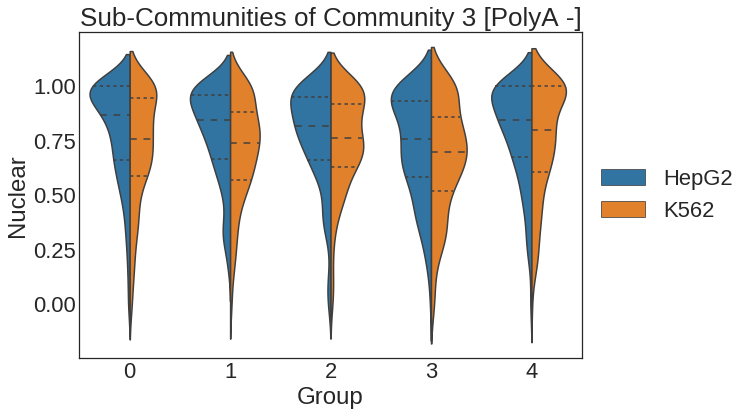

In [60]:
plt.style.use("seaborn-white")

sns.violinplot(x='Group',
             y='Nuclear',
             hue='Cell Type',
             data=df[df['Method'] == 'PolyA -'],
             split=True,
             inner='quartile')
plt.title('Sub-Communities of Community 3 [PolyA -]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

outfile = '/home/jessime/Research/pics/paper/local_comm3_non.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [59]:
model = ols('Nuclear ~ Group', data=df[df['Method'] == 'PolyA -'].dropna()).fit()
anova = sm.stats.anova_lm(model, typ=2)
display(anova)

sum_sq      df         F    PR(>F)
Group       0.014713     1.0  0.259788  0.610314
Residual  131.788477  2327.0       NaN       NaN

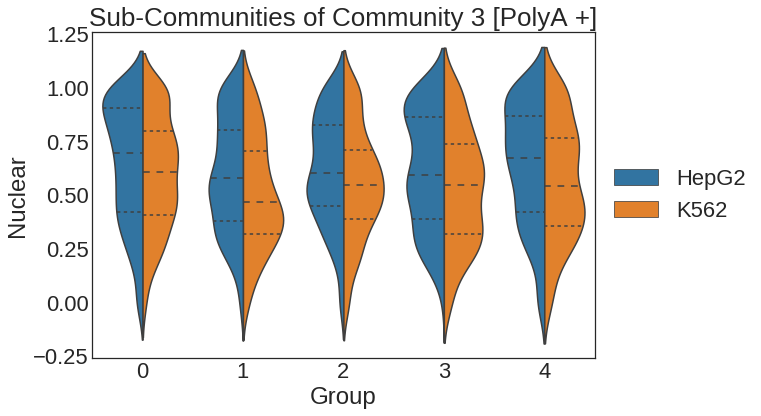

In [61]:
sns.violinplot(x='Group',
             y='Nuclear',
             hue='Cell Type',
             data=df[df['Method'] == 'PolyA +'],
             split=True,
             inner='quartile')
plt.title('Sub-Communities of Community 3 [PolyA +]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

outfile = '/home/jessime/Research/pics/paper/local_comm3_poly.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [58]:
model = ols('Nuclear ~ Group', data=df[df['Method'] == 'PolyA +'].dropna()).fit()
anova = sm.stats.anova_lm(model, typ=2)
display(anova)

sum_sq      df         F    PR(>F)
Group       0.10558     1.0  1.446938  0.229139
Residual  173.95499  2384.0       NaN       NaN

## Comm 1

In [65]:
group0 = v22_counts[groups['Group'] == 0]
print(len(group0))
print()

group0_names = groups[groups['Group'] == 0].index.values
sim = pd.DataFrame(np.corrcoef(group0),
                   group0_names,
                   group0_names)
gmlfile = '/home/jessime/Research/networks/v22_comm0_subs.gml'

gm = network.GraphMaker(sim, gmlfile, limit=.13)
gm.find_main_sub()
print(len(gm.main_sub))

gm.save()
gm.get_partition(gmlfile)
print(gm.partition_summary())

sizes = gm.partition.sizes()
fold_change = [sizes[i]/sizes[i+1] for i in range(len(sizes)-1)] 
for i, fc in enumerate(fold_change[:7]):
    print(f'{i}-{i+1}: {fc:.2f}')
    
gm.membership2attribute(4)
gm.save()

3020

3020
Finished reading file
-------
Summary
-------

Quality:  11917.310458502261
Modularity:  0.1197574321690885
Group #:  64
Sizes : [1163, 793, 636, 350, 16, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1]

None
0-1: 1.47
1-2: 1.25
2-3: 1.82
3-4: 21.88
4-5: 8.00
5-6: 1.00
6-7: 1.00
Finished partitioning. Creating attribute.


In [67]:
sub0 = pd.DataFrame.from_dict(nx.get_node_attributes(gm.graph, 'Group'), orient='index')
sub0.columns = ['Group']
sub0 = sub0.join(localization[['HepG2_Non', 'HepG2_Poly', 'K562_Non', 'K562_Poly']])
sub0 = sub0[~sub0.index.duplicated(keep='first')]

loc_data = np.hstack((sub0['HepG2_Non'].values,
                      sub0['HepG2_Poly'].values,
                      sub0['K562_Non'].values,
                      sub0['K562_Poly'].values
                     ))

df = pd.DataFrame.from_dict({'Group': sub0['Group'].values.tolist()*4,
                            'Cell Type': ['HepG2']*(len(sub0)*2) + ['K562']*(len(sub0)*2),
                            'Method': (['PolyA -']*len(sub0) + ['PolyA +']*len(sub0))*2,
                            'Nuclear': loc_data
                           })

df.to_csv('/home/jessime/Research/papers/revisions/local_comm1_subs.csv')
df.head()

Cell Type  Group   Method   Nuclear
0     HepG2      0  PolyA -       NaN
1     HepG2      1  PolyA -  0.944723
2     HepG2      1  PolyA -  0.977145
3     HepG2      0  PolyA -  0.982511
4     HepG2      2  PolyA -  1.000000

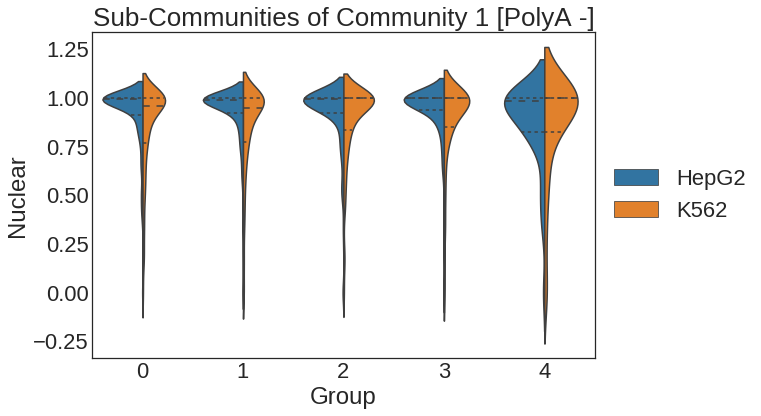

In [68]:
sns.violinplot(x='Group',
             y='Nuclear',
             hue='Cell Type',
             data=df[df['Method'] == 'PolyA -'],
             split=True,
             inner='quartile')
plt.title('Sub-Communities of Community 1 [PolyA -]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

outfile = '/home/jessime/Research/pics/paper/local_comm1_non.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [69]:
model = ols('Nuclear ~ Group', data=df[df['Method'] == 'PolyA -'].dropna()).fit()
anova = sm.stats.anova_lm(model, typ=2)
display(anova)

sum_sq      df         F    PR(>F)
Group       0.128438     1.0  3.283355  0.070063
Residual  151.973185  3885.0       NaN       NaN

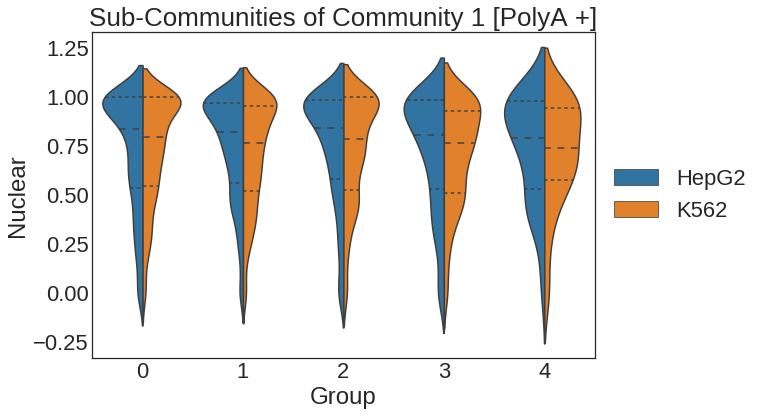

In [70]:
sns.violinplot(x='Group',
             y='Nuclear',
             hue='Cell Type',
             data=df[df['Method'] == 'PolyA +'],
             split=True,
             inner='quartile')
plt.title('Sub-Communities of Community 1 [PolyA +]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

outfile = '/home/jessime/Research/pics/paper/local_comm1_poly.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)
plt.show()

In [71]:
model = ols('Nuclear ~ Group', data=df[df['Method'] == 'PolyA +'].dropna()).fit()
anova = sm.stats.anova_lm(model, typ=2)
display(anova)

sum_sq      df        F    PR(>F)
Group       0.004421     1.0  0.05695  0.811397
Residual  283.831528  3656.0      NaN       NaN

# 7mers

I'd like to show that there's no significant difference between communities using 6mers and using 7mers.

Instead of arbitrarily picking a threshold for 7mers, I'm just going to take the top `n` edges, where `n` is the number of edges in 6mers when `R = .13`.

In [7]:
%aimport kmer_counts

In [8]:
%aimport network

In [10]:
!wc -l /home/jessime/Documents/edges.csv

694525 /home/jessime/Documents/edges.csv


In [88]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'
counter = kmer_counts.BasicCounter(infasta, k=7)
counter.get_counts()
sim = np.corrcoef(counter.counts)

A Jupyter Widget

In [ ]:
sim_flat = np.sort(sim[np.triu_indices_from(sim, 1)])

In [9]:
print(len(sim)**2)
print(len(sim_flat))
print(sim_flat[:5])
print(sim_flat[-5:])
print(sim_flat[-694525])

254498209
127241128
[-0.22702323 -0.2260595  -0.19874926 -0.19573256 -0.19519542]
[ 1.  1.  1.  1.  1.]
0.0532234945812


In [11]:
print(sim_flat[-694525 - 2: -694525 + 2])

[ 0.05322347  0.05322347  0.05322349  0.05322353]


In [13]:
describe(sim_flat)

DescribeResult(nobs=127241128, minmax=(-0.22702323137152175, 1.0), mean=-8.1521042968154354e-07, variance=0.00022040067250134659, skewness=2.0556086684134045, kurtosis=62.99494287538559)

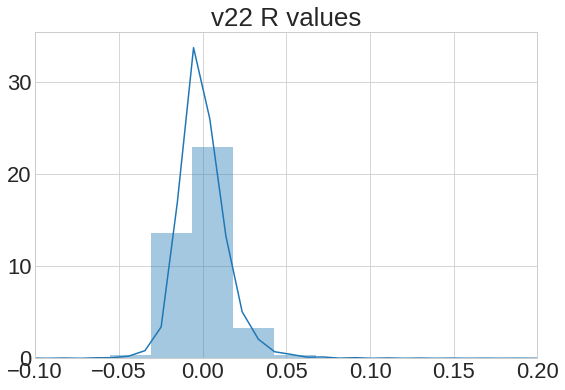

In [14]:
sns.distplot(sim_flat)
plt.xlim((-.1, .2))
plt.title('v22 R values')
plt.show()

This isn't perfect, because the ~600k edges are from just the main connected subgraph. I'm going to estimate that .05 will give me close to 600k edges in the 7mers. I'll run it and see what happens. I can do this multiple times if necessary.

In [90]:
names = '/home/jessime/Research/v22_names01B_pk.txt'
names = pickle.load(open(names, 'rb'))

sim = pd.DataFrame(sim, names, names)

In [20]:
gmlfile = '/home/jessime/Research/networks/v22_7mers_p05.gml'
gm = network.GraphMaker(sim, gmlfile, limit=0.05)
#find subgraph
gm.find_main_sub()
#save subgraph
gm.save(main_sub=True)
#load back in
sub = network.GraphMaker(gmlfile=gmlfile, gamma=1)
sub.graph = gm.main_sub
#partition and store
sub.membership2attribute(lim=5)
sub.partition_summary()
sub.save()

Running partition
Finished reading file
Finished partitioning. Creating attribute.
-------
Summary
-------

Quality:  74145.50291259079
Modularity:  0.5965649183563937
Group #:  25
Sizes : [4678, 4555, 3803, 1408, 1124, 124, 120, 33, 8, 3, 3, 3, 2, 2, 2]



In [23]:
sizes = sub.partition.sizes()
fold_change = [sizes[i]/sizes[i+1] for i in range(len(sizes)-1)] 
for i, fc in enumerate(fold_change[:7]):
    print(f'{i}-{i+1}: {fc:.2f}')

0-1: 1.03
1-2: 1.20
2-3: 2.70
3-4: 1.25
4-5: 9.06
5-6: 1.03
6-7: 3.64


We're off to a good start in that there are 5 communities (plus a null).

In [38]:
sub.graph.number_of_edges()

871756

But we've got too nodes and too many edges. What I should be more worried about is the number of nodes. If I don't have a similar number of non-null nodes, then there's no way I'm going to have similar communities.

In [11]:
groups = '/home/jessime/Research/groups.csv'
groups = pd.read_csv(groups, index_col=0)
groups.columns = ['6mers']
groups.head()

6mers
RP11-34P13.3-001      2
FAM138A-001           5
RP11-34P13.7-001      5
RP11-34P13.7-201      5
RP11-34P13.8-001      5

In [44]:
len(groups[groups['6mers'] != 5])

8426

In [94]:
gmlfile = '/home/jessime/Research/networks/v22_7mers_p0775.gml'
gm = network.GraphMaker(sim, gmlfile, limit=0.0775)
#find subgraph
gm.find_main_sub()
#save subgraph
gm.save(main_sub=True)
#load back in
sub = network.GraphMaker(gmlfile=gmlfile, gamma=1)
sub.graph = gm.main_sub
#partition and store
sub.membership2attribute(lim=5)
sub.partition_summary()
sub.save()

print()
print(sum(sub.partition.sizes()))
print(sub.graph.number_of_edges())

Running partition
Finished reading file
Finished partitioning. Creating attribute.
-------
Summary
-------

Quality:  27570.582346124775
Modularity:  0.6913151938988896
Group #:  289
Sizes : [2106, 1722, 1128, 925, 371, 252, 129, 121, 120, 115, 103, 87, 83, 79, 79]

0-1: 1.22
1-2: 1.53
2-3: 1.22
3-4: 2.49
4-5: 1.47
5-6: 1.95

8709
189325


Hmmm... This actually isn't looking as promising as I had hoped. Let's look at some contingency tables.

In [95]:
sevens = nx.get_node_attributes(sub.graph, 'Group')
groups['7mers'] = [sevens[k] if k in sevens else 5 for k in groups.index]
print(groups.shape)
groups.head()

(15953, 3)


6mers  7mers  5mers
RP11-34P13.3-001      2      5      2
FAM138A-001           5      5      1
RP11-34P13.7-001      5      5      5
RP11-34P13.7-201      5      5      5
RP11-34P13.8-001      5      5      5

In [96]:
table = pd.crosstab(groups['6mers'], groups['7mers'])
table

7mers     0     1    2    3    4     5
6mers                                 
0         5  1629   70   68   50  1198
1       988     3   53   47   53   868
2      1026     0   32   27   11   424
3        11     5  888   38    0   155
4         0     1    5  671    2    98
5        76    84   80   74  255  6958

To be able to use the `chi2_contingency` function in scipy, I probably need to line up the groups along the diagnal. I can do this by renaming groups of 7mers.

> Nested dictionaries, e.g., {‘a’: {‘b’: nan}}, are read as follows: look in column ‘a’ for the value ‘b’ and replace it with nan.

In [97]:
groups2 = groups.copy()
new_nums = {0:2, 1:0, 2:3, 3:4, 4:1, 5:5}
groups2['7mers'] = [new_nums[i] for i in groups['7mers'].values]
table2 = pd.crosstab(groups2['6mers'], groups2['7mers'])
#table2.replace({1:{52:986}, 2:{986:52}}, inplace=True)
table2

7mers     0    1     2    3    4     5
6mers                                 
0      1629   50     5   70   68  1198
1         3   53   988   53   47   868
2         0   11  1026   32   27   424
3         5    0    11  888   38   155
4         1    2     0    5  671    98
5        84  255    76   80   74  6958

In [98]:
results = chi2_contingency(table2)
results

(34133.644959594531,
 0.0,
 25,
 array([[  325.98508118,    70.23255814,   398.67861844,   213.53726572,
           175.10813013,  1836.45834639],
        [  217.17946468,    46.79069767,   265.60972858,   142.26390021,
           116.66144299,  1223.49476587],
        [  164.07196139,    35.34883721,   200.6594371 ,   107.4757099 ,
            88.13389331,   924.3101611 ],
        [  118.41246161,    25.51162791,   144.81802796,    77.56635116,
            63.60715853,   667.08437285],
        [   83.87099605,    18.06976744,   102.57393594,    54.93988591,
            45.05265467,   472.49275998],
        [  812.4800351 ,   175.04651163,   993.66025199,   532.21688711,
           436.43672037,  4577.15959381]]))

In [99]:
outfile = '/home/jessime/Research/papers/revisions/7mers_contingency.csv'
table2.to_csv(outfile)

The 0.0 is the p-value and indicates a significant amount of similarity.

In [61]:
type(results[1])

numpy.float64

In [74]:
np.array([1E-323])

array([  9.88131292e-324])

In [75]:
np.nextafter(0, 1)

4.9406564584124654e-324

I'm not entirely sure what `nextafter` does, but it looks like it's where things get rounded to 0.

In [76]:
np.nextafter(0, 1, dtype=np.float128)

3.6451995318824746025e-4951

## And 5mers

Mauro originally had 4mers and 8mers as well, but I'd rather not do this. I'll do it later if necessary.

In [100]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'
counter = kmer_counts.BasicCounter(infasta, k=5)
counter.get_counts()
sim = np.corrcoef(counter.counts)

A Jupyter Widget

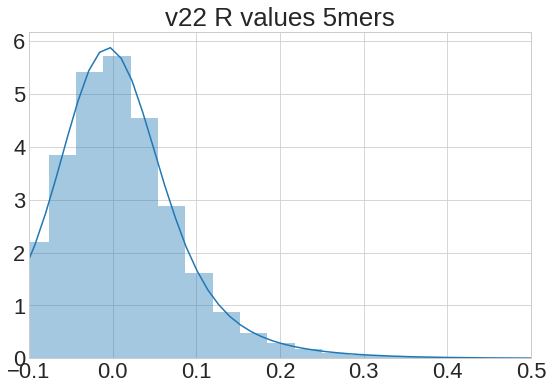

In [101]:
sim_flat = sim[np.triu_indices_from(sim, 1)]

sns.distplot(sim_flat)
plt.xlim((-.1, .5))
plt.title('v22 R values 5mers')
plt.show()

Bad range, but I don't want to rerun

In [102]:
names = '/home/jessime/Research/v22_names01B_pk.txt'
names = pickle.load(open(names, 'rb'))
sim = pd.DataFrame(sim, names, names)

In [133]:
gmlfile = '/home/jessime/Research/networks/v22_5mers_p26.gml'
gm = network.GraphMaker(sim, gmlfile, limit=0.26)
#find subgraph
gm.find_main_sub()
#save subgraph
gm.save(main_sub=True)
#load back in
sub = network.GraphMaker(gmlfile=gmlfile, gamma=1)
sub.graph = gm.main_sub
#partition and store
sub.membership2attribute(lim=5)
sub.partition_summary()
sub.save()

print()
print(sum(sub.partition.sizes()))
print(sub.graph.number_of_edges())

Running partition
Finished reading file
Finished partitioning. Creating attribute.
-------
Summary
-------

Quality:  349793.3222930235
Modularity:  0.5157942068594722
Group #:  402
Sizes : [3227, 2119, 1452, 886, 106, 102, 58, 52, 29, 17, 14, 11, 11, 10, 9]

0-1: 1.52
1-2: 1.46
2-3: 1.64
3-4: 8.36
4-5: 1.04
5-6: 1.76

8590
1031591


In [134]:
fives = nx.get_node_attributes(sub.graph, 'Group')
groups['5mers'] = [fives[k] if k in fives else 5 for k in groups.index]
print(groups.shape)
groups.head()

(15953, 3)


6mers  7mers  5mers
RP11-34P13.3-001      2      5      2
FAM138A-001           5      5      1
RP11-34P13.7-001      5      5      5
RP11-34P13.7-201      5      5      5
RP11-34P13.8-001      5      5      5

In [135]:
table = pd.crosstab(groups['6mers'], groups['5mers'])
table

5mers     0     1     2    3   4     5
6mers                                 
0      2835     1     0    2   3   179
1         1  1785    28    8   8   182
2         1    52  1343    1   0   123
3       107    81    23  491   3   392
4        57    67    24  371   8   250
5       226   133    34   13  84  7037

In [136]:
chi2_contingency(table)[1]

0.0

In [137]:
outfile = '~/Research/papers/revisions/5mers_contingency.csv'
table.to_csv(outfile)

# Clean up

This is just a few random things I'm doing while writing responses.

In [2]:
!mv /home/jessime/Research/pics/paper/tetris_k/r_vals.pdf \
/home/jessime/Research/pics/paper/tetris_k/tetris_kmer_Rs.pdf

In [42]:
!mv /home/jessime/Research/pics/paper/tetris_k/tetris_kmer_Rs.pdf \
/home/jessime/Research/pics/paper/tetris_k/tetris_kmer_Rs_old.pdf

I just noticed that my kmer size vs TETRIS scores is slightly off. In the paper we report a an R of -.52 for 6mers, but in the graph of 1-8mers, I have a 6mers R of -.48. It's mostly because which sequences I used are slighly different and being pulled from different files. I'm going to fix this really quick.

In [13]:
luc3 = '/home/jessime/Research/tetris/luc3_s11.xlsx'
luc3 = pd.read_excel(luc3, index_col=0)
luc3.head()

ID                                    cloned fragment spliced  \
0  1700047N06rik  AACAGTGGTGCCTTCCTCTGGGACCAGCTTTCCCAAGCTGGAAATA...       n   
1  1700086L19Rik  GTTCTGAGCCGGAGCGAGAGGCGCTTCAGAGAAGGAGGGACCGACC...       y   
2  1810010K12Rik  CCTGCTCCATTTCAACCATTGTGTGCTTTGGGAGAATAATTAAGTT...       n   
3   493057O11Rik  CTCCTAAGAATCTAAGCAAAATAGAGTTGGAACAGGTAAATAACAT...       n   
4  5730488B01Rik  TAGGGACCCTGACTTCGTTGATTCTTTAAATCCCCTCTCCTCGATC...       n   

  mm10_chr  mm10_start    mm10_end strand  rel. luc.     SEEKR  nhmmer_x  \
0        1  10056969.0  10057963.0      -   3.107935 -0.070944       0.0   
1       12  74284276.0  74295938.0      +   0.456968 -0.011457       0.0   
2        2  19451806.0  19453154.0      +   2.072199  0.109939       0.0   
3        8  81665775.0  81667100.0      -   2.183471 -0.028118       0.0   
4        4  44702820.0  44705230.0      +   1.137146  0.053491       0.0   

       ...        R_seg_xist18_1  R_whole_xist18_1  R_seg_xist18_2  \
0      ...             -0.480804         -0.480804       -0.201591   
1      ...             -0.859354         -0.859354       -0.439783   
2      ...              0.397996          0.397996        0.419711   
3      ...             -0.234032         -0.234032       -0.037956   
4      ...              0.151595          0.113213        0.223790   

   R_whole_xist18_2  R_seg_xist18_3  R_whole_xist18_3  R_seg_xist18_5  \
0         -0.201591       -0.334069         -0.334069       -0.146894   
1         -0.439783       -0.060431         -0.060431       -0.012132   
2          0.419711        0.391061          0.391061        0.208215   
3         -0.037956       -0.085065         -0.085065       -0.049991   
4          0.179038        0.302333          0.270653        0.154932   

   R_whole_xist18_5       std       Paper ID  
0         -0.146894  0.296776  1700047N06rik  
1         -0.012132  0.096542  1700086L19Rik  
2          0.208215  0.115907  1810010K12Rik  
3         -0.049991  0.247484   493057O11Rik  
4          0.140019  0.199180  5730488B01Rik  

[5 rows x 43 columns]

In [14]:
pearsonr(luc3['rel. luc.'], luc3['R_whole_xist18_6'])

(-0.51754054341974232, 0.00074054631270030989)

In [16]:
for i in range(1, 7):
    print(i, pearsonr(luc3['rel. luc.'], luc3[f'R_whole_xist18_{i}']))

1 (-0.44247766776264147, 0.0047935516258013509)
2 (-0.4542974695799083, 0.0036699691879341807)
3 (-0.47725222471486672, 0.0021254569742578263)
4 (-0.47108383833069839, 0.0024705525526715665)
5 (-0.49193232624272892, 0.0014689659839248414)
6 (-0.51754054341974232, 0.00074054631270030989)


Maybe there are some sequence mismatches?

I tracked down the sequences I used to make the 1-6mers originally:

In [17]:
%aimport fasta

In [34]:
%aimport kmer_counts

In [19]:
old_fasta = '/home/jessime/Research/tetris/frags_xist18.fa'
old_fasta = fasta.Maker(old_fasta)
print(len(old_fasta.seqs))

62


In [32]:
for i, row in luc3.iterrows():
    if row['cloned fragment'].upper() not in old_fasta.seqs:
        print(row['ID'], len(row['cloned fragment']))

Okay, all the sequences I have in the paper version were in the original version as well.

This might mean they they're just mis-matched.

In [35]:
xist = '/home/jessime/Research/indv_seqs/M5_xist_1800frag.fa'
mean = f'/home/jessime/Code/old_kmers/data/M5_transcripts01_mean6.npy'
std = f'/home/jessime/Code/old_kmers/data/M5_transcripts01_std6.npy'
xist = fasta.Maker(xist)
counter = kmer_counts.BasicCounter(mean=mean, std=std)
counter.seqs = luc3['cloned fragment'].str.upper().tolist() + xist.seqs
counter.get_counts()
sim = np.corrcoef(counter.counts)
new_sim = sim[-1, :-1]

A Jupyter Widget

In [36]:
new_sim

array([-0.07141877, -0.01404561,  0.09993749, -0.03683125,  0.04352515,
       -0.01870023, -0.05097233,  0.02811177,  0.02002424, -0.01988057,
       -0.06558379,  0.14873984, -0.07166728,  0.10746861,  0.02403778,
        0.00397273, -0.00597105,  0.00866358,  0.05281967,  0.07699552,
        0.07676619,  0.08488601, -0.00418144,  0.00600477,  0.08948228,
        0.06924662,  0.06431534,  0.07777841,  0.07421415,  0.07086011,
        0.04466714, -0.01037026,  0.076193  ,  0.00307109,  0.04475759,
        0.09339385,  0.17788258,  0.17204542,  0.18475109])

In [37]:
luc3['R_whole_xist18_6'].values

array([-0.07094356, -0.01145687,  0.10993908, -0.02811763,  0.05349148,
       -0.03189983, -0.05658189,  0.03337321,  0.01403933, -0.02378279,
       -0.05875275,  0.14815246, -0.07643202,  0.11718431,  0.01838884,
       -0.00233519,  0.00107655,  0.00831365,  0.03749534,  0.06041631,
        0.07824405,  0.08980615, -0.00791955,  0.01703653,  0.08236793,
        0.07057905,  0.05596992,  0.07040465,  0.06609489,  0.07121721,
        0.04298762, -0.01030741,  0.08802319, -0.00029594,  0.04918845,
        0.09646355,  0.17344818,  0.17411238,  0.18883501])

Let's get the right Xist fragment...

In [38]:
counter = kmer_counts.BasicCounter(mean=mean, std=std)
counter.seqs = luc3['cloned fragment'].str.upper().tolist() + [old_fasta.seqs[-1]]
counter.get_counts()
sim = np.corrcoef(counter.counts)
new_sim = sim[-1, :-1]
new_sim

A Jupyter Widget

array([-0.07094355, -0.01145686,  0.10993908, -0.02811763,  0.05349148,
       -0.03189983, -0.05658189,  0.03337322,  0.01403932, -0.02378278,
       -0.05875275,  0.14815247, -0.07643202,  0.1171843 ,  0.01838885,
       -0.00233519,  0.00107656,  0.00831365,  0.05671178,  0.07712267,
        0.07824405,  0.08980617, -0.00791955,  0.00552324,  0.08236793,
        0.07057906,  0.05596992,  0.07040466,  0.06609489,  0.07121722,
        0.04298762, -0.0103074 ,  0.08802315, -0.00029595,  0.04918845,
        0.09646353,  0.17344818,  0.17411237,  0.18883498])

Awesome! Let's recalculate and fix that image, then move on.

In [40]:
mean = f'/home/jessime/Code/old_kmers/data/M5_transcripts01_mean7.npy'
std = f'/home/jessime/Code/old_kmers/data/M5_transcripts01_std7.npy'
counter = kmer_counts.BasicCounter(mean=mean, std=std, k=7)
counter.seqs = luc3['cloned fragment'].str.upper().tolist() + [old_fasta.seqs[-1]]
counter.get_counts()
sim = np.corrcoef(counter.counts)
luc3['R_whole_xist18_7'] = sim[-1, :-1]

mean = f'/home/jessime/Code/old_kmers/data/M5_transcripts01_mean8.npy'
std = f'/home/jessime/Code/old_kmers/data/M5_transcripts01_std8.npy'
counter = kmer_counts.BasicCounter(mean=mean, std=std, k=8)
counter.seqs = luc3['cloned fragment'].str.upper().tolist() + [old_fasta.seqs[-1]]
counter.get_counts()
sim = np.corrcoef(counter.counts)
luc3['R_whole_xist18_8'] = sim[-1, :-1]

A Jupyter Widget

A Jupyter Widget

In [41]:
r_vals = []
for i in range(1, 9):
    r_p = pearsonr(luc3['rel. luc.'], luc3[f'R_whole_xist18_{i}'])
    r_vals.append(r_p[0])
    print(i, r_p)

1 (-0.44247766776264147, 0.0047935516258013509)
2 (-0.4542974695799083, 0.0036699691879341807)
3 (-0.47725222471486672, 0.0021254569742578263)
4 (-0.47108383833069839, 0.0024705525526715665)
5 (-0.49193232624272892, 0.0014689659839248414)
6 (-0.51754054341974232, 0.00074054631270030989)
7 (-0.46693408405956954, 0.0027294924718901394)
8 (-0.34385646046407847, 0.032084656633283734)


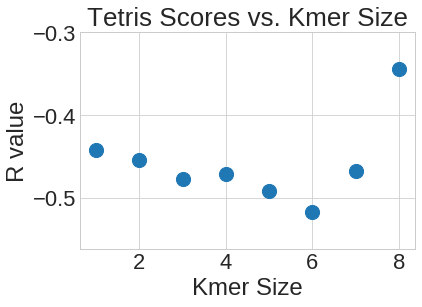

In [44]:
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.scatter(list(range(1,9)), r_vals, s=200)
plt.xlabel('Kmer Size')
plt.ylabel('R value')
plt.title('Tetris Scores vs. Kmer Size')
outfile = '/home/jessime/Research/pics/paper/tetris_k/tetris_kmer_Rs.pdf'
plt.savefig(outfile, bbox_inches='tight', dpi=600)

# MEME

This might be the biggest undertaking for revisions, depending on how the details play out. We got several questions about motifs, but here's one of the main ones:

> Figure 3 B is very high level. The authors do a large regression analysis on all proteins. It is unclear why the authors do not show more specific data suggesting that their kmer method is able to detect lncRNA functions; e.g., are there specific kmer signatures associated with specific binding proteins? How is this analysis different from simply looking for binding motifs within lncRNAs? The eCLIP data can be used to generate putative binding motifs, and these motifs should be looked for within the lncRNAs. The authors should then show whether or not this kmer method is in fact better than a simple motif analysis.  

Here's our initial plan for attacking this:

* Select the protein that did the best in our LR analysis.
* Use MEME to predict all binding sites of the protein in the transcriptome [our lncRNAs].
* Download Gene Yeo's ENCODE data for the protein
* Use the ENCODE data to split predicted motifs into True Positives and False Positives
* Choose some sized region surrounding the binding site, and extract the sequences
* Find the kmer content of all the sequence
* Test if there is a significant difference between the True and False Positives 

Step 1 is pretty easy, I'm going to take IGF2BP1, which does really well. The next best option would be HNRNPC, if we want to do just a second follow up.

The next thing is to build a proper PWM file for MEME. One of the things it requires is background letter frequencies. So let's get those.

In [53]:
infasta = '/home/jessime/Research/v22_transcripts01.fa'

with open(infasta) as infasta:
    counts = Counter(''.join(l for l in infasta if l[0] != '>'))

counts = {k:v for k,v in counts.items() if k in 'ACGT'}
counts

{'A': 4975723, 'C': 4331873, 'G': 4303960, 'T': 4767826}

In [54]:
total = sum(counts.values())
{k:v/total for k,v in counts.items()}

{'A': 0.2707230852484594,
 'C': 0.23569198354982773,
 'G': 0.2341732708967037,
 'T': 0.2594116603050092}

At this point, we can try running FIMO (the specific program we need from the MEME suite).

```bash
fimo --thresh .01 --oc ~/Research/proteins/motifs/IGF2BP2_meme/ ~/Research/proteins/motifs/IGF2BP2_pwm_meme.txt ~/Research/v22_transcripts01.fa 
```

Now I need to poke around the eCLIP data.

In [74]:
bed_files = [
'/home/jessime/Research/proteins/eCLIP/IGF2BP1/HepG2/205_01.basedon_205_01.peaks.l2inputnormnew.bed.compressed.bed.narrowPeak.encode.bed',
'/home/jessime/Research/proteins/eCLIP/IGF2BP1/HepG2/205_02.basedon_205_02.peaks.l2inputnormnew.bed.compressed.bed.narrowPeak.encode.bed',
'/home/jessime/Research/proteins/eCLIP/IGF2BP1/K562/220_01.basedon_220_01.peaks.l2inputnormnew.bed.compressed.bed.narrowPeak.encode.bed',
'/home/jessime/Research/proteins/eCLIP/IGF2BP1/K562/220_02.basedon_220_02.peaks.l2inputnormnew.bed.compressed.bed.narrowPeak.encode.bed'
]

igf2bp1_bed = pd.concat((pd.read_table(f, header=None)) for f in bed_files)
igf2bp1_bed.columns = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount']
print(igf2bp1_bed.shape)
igf2bp1_bed.head()

(413359, 10)


chrom  chromStart  chromEnd                 name  score  \
0  chr14_GL000194v1_random       72395     72478  IGF2BP1_HepG2_rep01    200   
1  chr14_GL000194v1_random       60186     60264  IGF2BP1_HepG2_rep01    200   
2  chr14_GL000194v1_random       71950     71972  IGF2BP1_HepG2_rep01    200   
3  chr14_GL000194v1_random       73572     73726  IGF2BP1_HepG2_rep01    200   
4  chr14_GL000194v1_random       72556     72562  IGF2BP1_HepG2_rep01    200   

  strand  thickStart  thickEnd  itemRgb  blockCount  
0      -    1.886399  2.078985       -1          -1  
1      -    1.556250  1.241046       -1          -1  
2      -    2.556250  1.104660       -1          -1  
3      -    0.996823  0.856579       -1          -1  
4      -    1.556250  0.711155       -1          -1

In [75]:
outfile = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/IGF2BP1.bed'
igf2bp1_bed.to_csv(outfile, sep='\t', header=False, index=False)

In [76]:
igf2bp1_bed['length'] = igf2bp1_bed['chromEnd'] - igf2bp1_bed['chromStart'] 

DescribeResult(nobs=413359, minmax=(1, 315), mean=41.314721585837006, variance=565.31531003327336, skewness=1.4347597906717513, kurtosis=4.40533900103371)

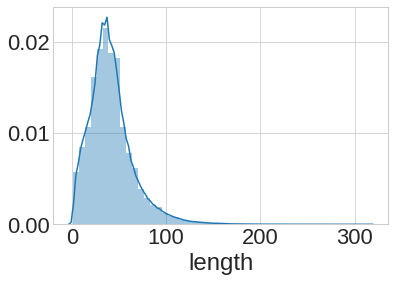

In [72]:
sns.distplot(igf2bp1_bed['length']);
describe(igf2bp1_bed['length'])

In [73]:
igf2bp1_bed['name'].value_counts()

IGF2BP1_HepG2_rep02    125761
IGF2BP1_K562_rep01     101599
IGF2BP1_HepG2_rep01    101252
IGF2BP1_K562_rep02      84747
Name: name, dtype: int64

In [77]:
%aimport fasta

In [78]:
infasta = '/home/jessime/Research/proteins/eCLIP/IGF2BP1/IGF2BP1.fa'
maker = fasta.Maker(infasta)

In [89]:
eclip_7mers = pd.DataFrame([list(s) for s in maker.seqs if len(s) == 7])
eclip_7mers_pwm = pd.DataFrame([c.value_counts() for i, c in eclip_7mers.iteritems()]).T
eclip_7mers_pwm /= eclip_7mers_pwm.sum()
eclip_7mers_pwm

0         1         2         3         4         5         6
A  0.222337  0.218213  0.236082  0.255670  0.265636  0.280412  0.227148
C  0.227148  0.238488  0.274570  0.275601  0.256357  0.223711  0.212371
G  0.334708  0.284192  0.282474  0.247079  0.263230  0.292440  0.377663
T  0.215808  0.259107  0.206873  0.221649  0.214777  0.203436  0.182818

In [90]:
eclip_7mers_pwm.sum()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
dtype: float64